<a href="https://colab.research.google.com/github/T-Anushri/Data-science-/blob/main/Graphication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#IMPORT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#READ DATASETS
orders = pd.read_csv('global_superstore_2016 - Orders.csv')
returns = pd.read_csv('global_superstore_2016 - Returns.csv')
people = pd.read_csv('global_superstore_2016 - People.csv')

In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   Postal Code     9994 non-null   float64
 9   City            51290 non-null  object 
 10  State           51290 non-null  object 
 11  Country         51290 non-null  object 
 12  Region          51290 non-null  object 
 13  Market          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [ ]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1079 entries, 0 to 1078
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Returned  1079 non-null   object
 1   Order ID  1079 non-null   object
 2   Region    1079 non-null   object
dtypes: object(3)
memory usage: 25.4+ KB


In [ ]:
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Person  24 non-null     object
 1   Region  24 non-null     object
dtypes: object(2)
memory usage: 512.0+ bytes


**MERGING DATASETS**

In [ ]:
people.head()

,Person,Region
0,Marilène Rousseau,Caribbean
1,Andile Ihejirika,Central Africa
2,Nicodemo Bautista,Central America
3,Cansu Peynirci,Central Asia
4,Lon Bonher,Central US


In [ ]:
orders['Customer Name'].isin(people['Person']).sum()

0

As we couldn't find out the purpose of people dataset, we have decided to not consider it for now.

In [ ]:
orders['Order ID'].isin(returns['Order ID']).sum()

2220

RETURNS dataset indicates the orders that have been returned.

In [ ]:
#COMBINE ORDERS AND RETURNS BASED ON COMMON COLUMNS
#LEFT JOIN ENSURES ALL ORDERS ARE PRESENT EVEN IF THERE IS NO CORRESPONDING RETURN RECORD
df = pd.merge(orders,returns,on=['Order ID','Region'],how='left')

**HANDLING MISSING VALUES**

In [ ]:
df.isnull().sum()/len(df)*100

Row ID             0.000000
Order ID           0.000000
Order Date         0.000000
Ship Date          0.000000
Ship Mode          0.000000
Customer ID        0.000000
Customer Name      0.000000
Segment            0.000000
Postal Code       80.514720
City               0.000000
State              0.000000
Country            0.000000
Region             0.000000
Market             0.000000
Product ID         0.000000
Category           0.000000
Sub-Category       0.000000
Product Name       0.000000
Sales              0.000000
Quantity           0.000000
Discount           0.000000
Profit             0.000000
Shipping Cost      0.000000
Order Priority     0.000000
Returned          95.706765
dtype: float64

Since 80% of POSTAL CODE column is missing, it is reasonable to drop that column. Other location related columns such as CITY, STATE, COUNTRY can be explored if needed.

In [ ]:
df = df.drop('Postal Code',axis=1)

The fact that 95% of RETURNED column is missing indicates that other orders are not returned. So replace NAN values with 'NO'

In [ ]:
df['Returned'] = df['Returned'].fillna('No')

**DATATYPE CONVERSIONS**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Region          51290 non-null  object 
 12  Market          51290 non-null  object 
 13  Product ID      51290 non-null  object 
 14  Category        51290 non-null  object 
 15  Sub-Category    51290 non-null  object 
 16  Product Name    51290 non-null  object 
 17  Sales           51290 non-null 

Converting ORDER DATE AND SHIP DATE into datetime objects is necessary for time-based analysis in future.

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

Converting SALES and PROFIT to numeric data types is essential for quantitative analysis.

In [ ]:
df[['Sales','Profit']]

,Sales,Profit
0,$221.98,$62.15
1,"$3,709.40",-$288.77
2,"$5,175.17",$919.97
3,"$2,892.51",-$96.54
4,"$2,832.96",$311.52
...,...,...
51285,$65.10,$4.50
51286,$16.72,$3.34
51287,$8.56,$2.48
51288,$13.44,$2.40


In [ ]:
def convert(x):
  x = x.replace('$','')
  x = x.replace(',','')
  return float(x)
df['Sales'] = df['Sales'].apply(convert)
df['Profit'] = df['Profit'].apply(convert)

In [ ]:
df[['Sales','Profit']]

,Sales,Profit
0,221.98,62.15
1,3709.40,-288.77
2,5175.17,919.97
3,2892.51,-96.54
4,2832.96,311.52
...,...,...
51285,65.10,4.50
51286,16.72,3.34
51287,8.56,2.48
51288,13.44,2.40


In [ ]:
df.dtypes

Row ID                     int64
Order ID                  object
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Mode                 object
Customer ID               object
Customer Name             object
Segment                   object
City                      object
State                     object
Country                   object
Region                    object
Market                    object
Product ID                object
Category                  object
Sub-Category              object
Product Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
Shipping Cost            float64
Order Priority            object
Returned                  object
dtype: object

In [ ]:
#Data integrity check
df.duplicated().sum()

0

**DEALING WITH OUTLIERS**

In [ ]:
df.corr()['Sales'].sort_values()

<ipython-input-20-6d75cf06e5ba>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Sales'].sort_values()


Discount        -0.086722
Row ID          -0.043889
Quantity         0.313577
Profit           0.484918
Shipping Cost    0.767835
Sales            1.000000
Name: Sales, dtype: float64

<Axes: xlabel='Shipping Cost', ylabel='Sales'>

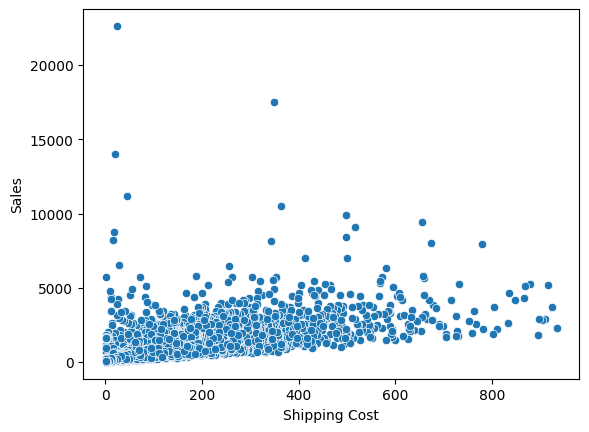

In [ ]:
sns.scatterplot(x='Shipping Cost',y='Sales',data=df)

<Axes: xlabel='Profit', ylabel='Sales'>

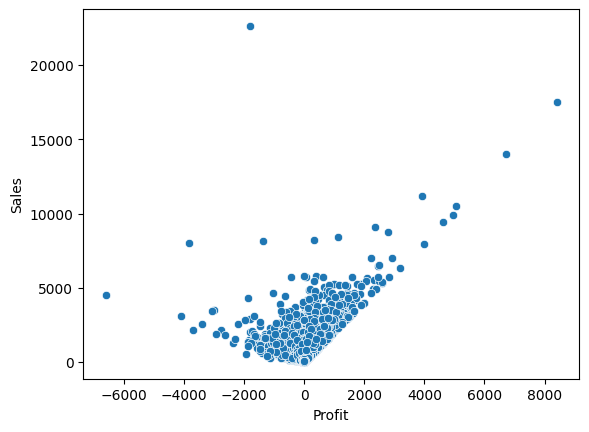

In [ ]:
sns.scatterplot(x='Profit',y='Sales',data=df)

In [ ]:
index = df[df['Sales']>20000][['Sales','Profit','Shipping Cost']].index

In [ ]:
df = df.drop(index,axis=0)

<Axes: xlabel='Shipping Cost', ylabel='Sales'>

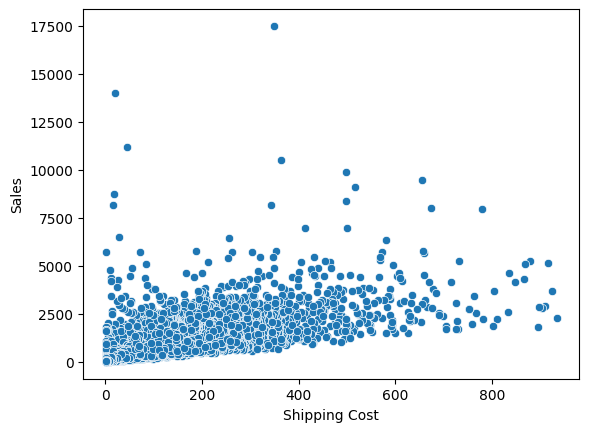

In [ ]:
sns.scatterplot(x='Shipping Cost',y='Sales',data=df)

<Axes: xlabel='Profit', ylabel='Sales'>

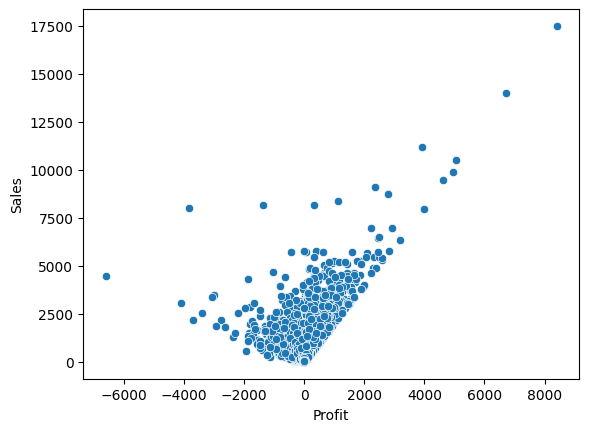

In [ ]:
sns.scatterplot(x='Profit',y='Sales',data=df)

**FEATURE ENGINEERING**

New features can be added and categorical columns can be encoded based on our goals.

In [ ]:
#FOR EXAMPLE, WE CAN ADD ORDER MONTH AND ORDER YEAR COLUMNS
df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year

**DATA VISUALISATION**

THE CHART IMPLIES THAT TECHNOLOGY HAS THE MOST SALES PROVING THE GROWTH OF TECHNOLOGY.

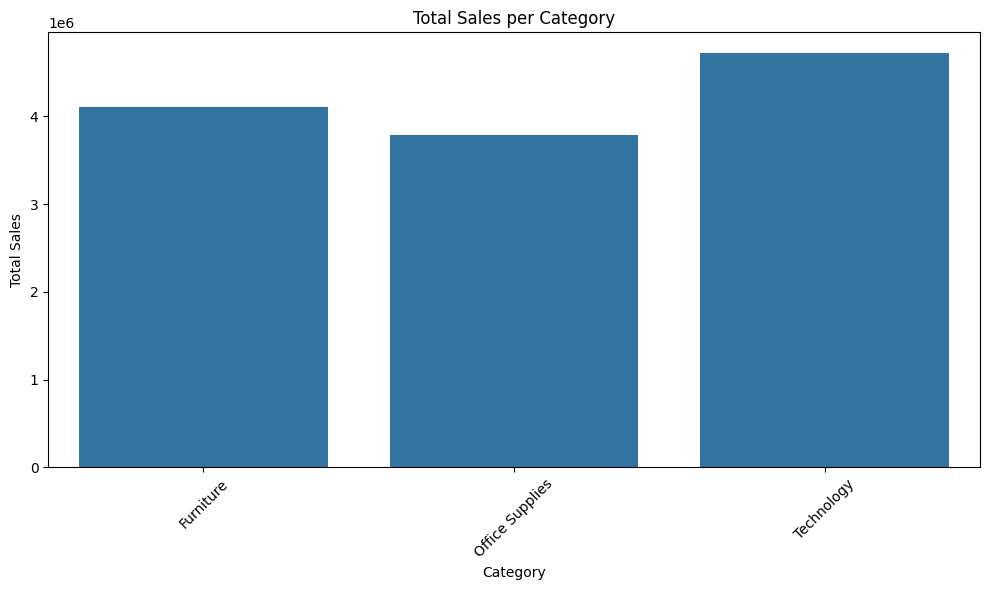

In [ ]:
total_sales_per_category = df.groupby('Category')['Sales'].sum()
total_sales_df = total_sales_per_category.reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Sales', data=total_sales_df)
plt.title('Total Sales per Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

UNITED STATES, AUSTRALIA AND FRANCE ARE FOUND TO BE THE MOST TECHNOLOGY USING COUNTRIES.

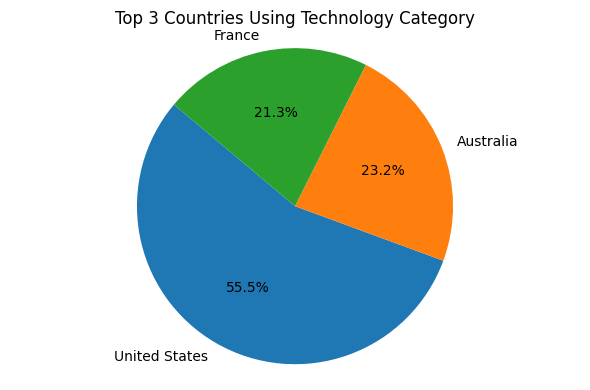

In [ ]:
technology_sales = df[df['Category'] == 'Technology']

technology_sales_per_country = technology_sales.groupby('Country')['Sales'].sum()

top_technology_countries = technology_sales_per_country.sort_values(ascending=False)

top_3_technology_countries = top_technology_countries.head(3)

plt.figure(figsize=(6, 4))
plt.pie(top_3_technology_countries, labels=top_3_technology_countries.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 3 Countries Using Technology Category')
plt.axis('equal')
plt.tight_layout()
plt.show()

STAPLES AND THE OTHER 4 PRODUCTS ARE SHOWN TO HAVE BEEN RETURNED THE MOST, REFLECTING THEIR BAD QUALITY.

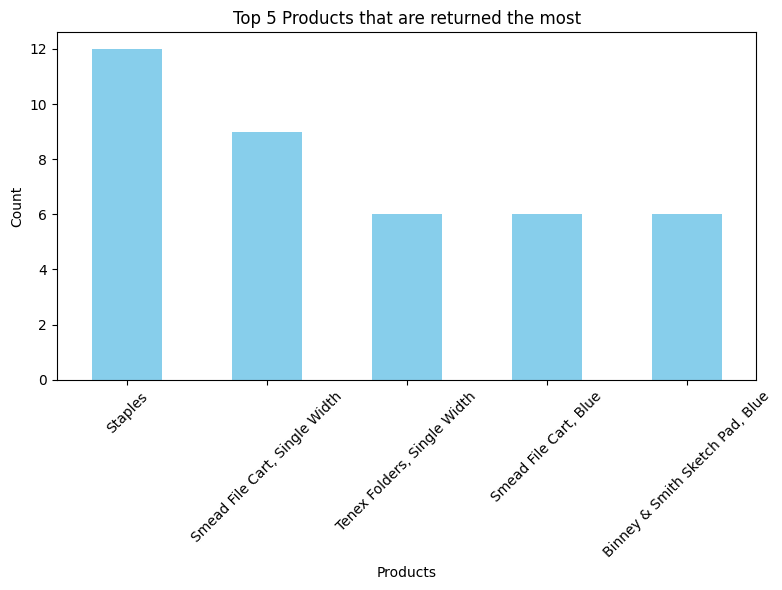

In [ ]:
returned_orders = df[df['Returned'] == 'Yes']

returned_orders_count = returned_orders['Product Name'].value_counts()

top_3_returned_orders = returned_orders_count.head(5)
plt.figure(figsize=(8, 6))
top_3_returned_orders.plot(kind='bar', color='skyblue')
plt.title('Top 5 Products that are returned the most')
plt.xlabel('Products')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

THE PROFIT IS FOUND TO BE GRADUALLY INCREASING.

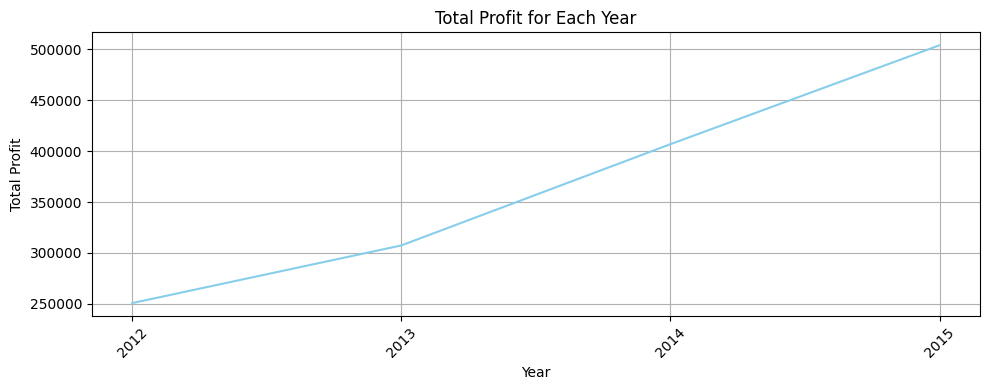

In [ ]:
yearly_profit = df.groupby('Order Year')['Profit'].sum()
plt.figure(figsize=(10, 4))
yearly_profit.plot(kind='line', color='skyblue')
plt.title('Total Profit for Each Year')
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.xticks([2012, 2013, 2014, 2015])
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**ROUND 2**

Developing a successful product discount plan is essential for optimizing sales and profitability.
A systematic approach is needed to strike the delicate balance between ensuring sustainable profit margins and attracting clients with appealing offers.
Determine the precise effect that various discount levels have on product
sales, do a thorough examination of previous sales data.
Compare the extra sales brought in by discounts against the possible drop in profit margins to determine the total profitability.
Take geographic variances into account in order to pinpoint local preferences and tailor discount tactics to the demands of particular markets.

In [ ]:
df = df.drop('Row ID',axis=1)
df['Profit Margin'] = df['Profit'] / df['Sales'] * 100
df['Profit Margin']

0        27.998018
1        -7.784817
2        17.776614
3        -3.337586
4        10.996272
           ...    
51285     6.912442
51286    19.976077
51287    28.971963
51288    17.857143
51289     2.932551
Name: Profit Margin, Length: 51289, dtype: float64

In [ ]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Country', 'Region',
       'Market', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost',
       'Order Priority', 'Returned', 'Order Month', 'Order Year',
       'Profit Margin'],
      dtype='object')

In [ ]:
total_sales = df.Sales.sum()
total_profit = df.Profit.sum()
profit_percent = total_profit/total_sales * 100
print('Total Sales:  ',total_sales)
print('Total Profit: ',total_profit)
print('Profit percentage: ',profit_percent)

Total Sales:   12619868.770000003
Total Profit:  1469267.79
Profit percentage:  11.642496580414122


**EXPLORATORY DATA ANALYSIS AND VISUALISATION**

<ipython-input-39-850e89dbbc87>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  seg_sales = df.groupby('Segment').sum()['Sales']
<ipython-input-39-850e89dbbc87>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  seg_profit = df.groupby('Segment').sum()['Profit']


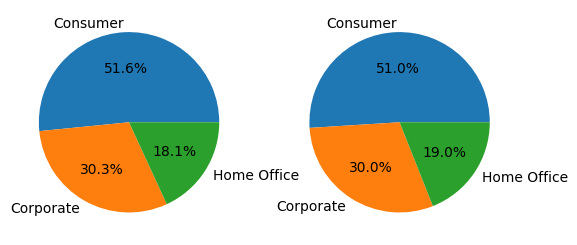

In [ ]:
#SEGMENT WISE SALES AND PROFITS
fig, axes = plt.subplots(nrows=1, ncols=2)
seg_sales = df.groupby('Segment').sum()['Sales']
seg_profit = df.groupby('Segment').sum()['Profit']
axes[0].pie(seg_sales, labels=seg_sales.index, autopct='%1.1f%%');
axes[1].pie(seg_profit, labels=seg_profit.index, autopct='%1.1f%%');

In [ ]:
#TOP 10 PROFITABLE PRODUCT AND ITS DISCOUNT
df['Profit per Quantity'] = df['Profit']/df['Quantity']
df.nlargest(10,'Profit per Quantity')[['Profit per Quantity','Profit Margin','Sales','Product Name','Discount']]

,Profit per Quantity,Profit Margin,Sales,Product Name,Discount
25238,1679.996667,48.000042,10499.97,Canon imageCLASS 2200 Advanced Copier,0.0
49003,1679.996000,48.000023,17499.95,Canon imageCLASS 2200 Advanced Copier,0.0
44248,1679.995000,47.999994,13999.96,Canon imageCLASS 2200 Advanced Copier,0.0
41524,997.995000,50.000000,3991.98,Canon imageCLASS MF7460 Monochrome Digital Las...,0.0
49940,979.997500,35.000004,11199.97,Canon imageCLASS 2200 Advanced Copier,0.2
46295,926.096000,49.000048,9449.95,Ibico EPK-21 Electric Binding System,0.0
5482,635.500000,50.000393,1270.99,Fellowes PB500 Electric Punch Plastic Comb Bin...,0.0
47672,635.496667,50.000131,3812.97,Fellowes PB500 Electric Punch Plastic Comb Bin...,0.0
11123,635.496000,50.000079,6354.95,Fellowes PB500 Electric Punch Plastic Comb Bin...,0.0
43888,635.495000,50.000000,2541.98,Fellowes PB500 Electric Punch Plastic Comb Bin...,0.0


In [ ]:
#TOP 10 PRODUCTS WITH HIGH DISCOUNTS
df.nlargest(10,'Discount')[['Profit per Quantity','Profit Margin','Sales','Product Name','Discount']]

,Profit per Quantity,Profit Margin,Sales,Product Name,Discount
5321,-481.135000,-346.676514,555.14,"Bevis Conference Table, Fully Assembled",0.85
13252,-190.686667,-473.363674,241.70,"Chromcraft Coffee Table, Fully Assembled",0.85
418,-1.080000,-169.633508,1.91,Insertable Tab Indexes For Data Binders,0.80
558,-5.130000,-160.012477,32.06,Avery Recycled Flexi-View Covers for Binding S...,0.80
618,-2.027500,-155.066922,5.23,Wilson Jones Four-Pocket Poly Binders,0.80
883,-5.130000,-160.012477,16.03,Avery Recycled Flexi-View Covers for Binding S...,0.80
1407,-1.620000,-165.306122,1.96,"Pressboard Covers with Storage Hooks, 9 1/2"" x...",0.80
1553,-1.962000,-154.976303,6.33,"Cardinal HOLDit! Binder Insert Strips,Extra St...",0.80
1820,-13.267500,-154.994159,34.24,"Wilson Jones Elliptical Ring 3 1/2"" Capacity B...",0.80
2402,-4.778000,-164.986188,14.48,"GBC White Gloss Covers, Plain Front",0.80


In [ ]:
#NO OF ORDERS FOR EACH DISCOUNT
df.groupby('Discount')['Order ID'].count().reset_index().sort_values('Order ID',ascending=False)

,Discount,Order ID
0,0.000,29009
6,0.200,4998
3,0.100,4068
14,0.400,3177
21,0.600,2006
24,0.700,1786
18,0.500,1632
5,0.170,735
17,0.470,725
4,0.150,541


In [ ]:
#NO OF UNIQUE CUSTOMERS FOR EACH DISCOUNT
grouped_customer_df = df.groupby('Discount')['Customer ID'].nunique().reset_index().sort_values('Customer ID',ascending=False)
grouped_customer_df.rename(columns={'Customer ID':'Count'}, inplace=True)
grouped_customer_df['Percentage'] = grouped_customer_df['Count']/df['Customer ID'].nunique() * 100
grouped_customer_df

,Discount,Count,Percentage
0,0.000,11613,66.683893
6,0.200,2513,14.430089
3,0.100,1749,10.043066
14,0.400,1676,9.623887
24,0.700,932,5.351708
18,0.500,875,5.024404
21,0.600,861,4.944014
5,0.170,454,2.606948
17,0.470,433,2.486362
1,0.002,412,2.365777


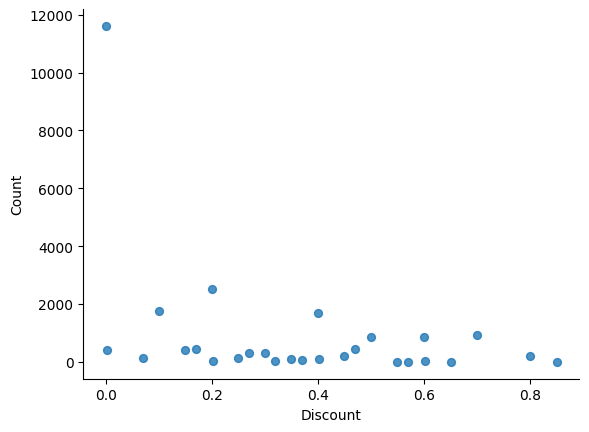

In [ ]:
# @title Discount vs Count
from matplotlib import pyplot as plt
grouped_customer_df.plot(kind='scatter', x='Discount', y='Count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

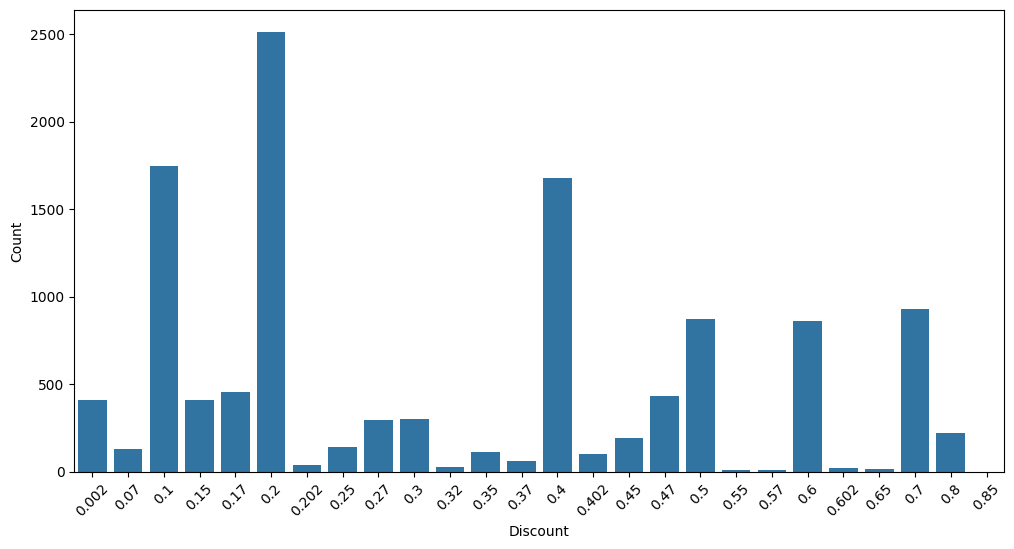

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=grouped_customer_df[grouped_customer_df['Discount']!=0.0]['Discount'],y=grouped_customer_df['Count'])
plt.xticks(rotation=45);

In [ ]:
#NO OF POSITIVE AND NEGATIVE PROFITS FOR EACH DISCOUNT
grouped_profit_df = df.groupby('Discount')['Profit'].apply(lambda x: pd.Series({'Profit': (x >= 0).sum(), 'Loss': (x < 0).sum()})).reset_index()
grouped_profit_df.rename(columns={'level_1': 'PROFIT/LOSS','Profit':'Count'}, inplace=True)
total_profit_count = grouped_profit_df[grouped_profit_df['PROFIT/LOSS']=='Profit']['Count'].sum()
total_loss_count = grouped_profit_df[grouped_profit_df['PROFIT/LOSS']=='Loss']['Count'].sum()
total_profit = df[df['Profit']>0].sum()
total_loss = df[df['Profit']<0].sum()
grouped_profit_df.loc[grouped_profit_df['PROFIT/LOSS'] == 'Profit', 'Percent_count'] = grouped_profit_df['Count'] / total_profit_count * 100
grouped_profit_df.loc[grouped_profit_df['PROFIT/LOSS'] == 'Loss', 'Percent_count'] = grouped_profit_df['Count'] / total_loss_count * 100

grouped_profit_df

<ipython-input-22-f059f9437b48>:6: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  total_profit = df[df['Profit']>0].sum()
<ipython-input-22-f059f9437b48>:7: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  total_loss = df[df['Profit']<0].sum()


,Discount,PROFIT/LOSS,Count,Percent_count
0,0.000,Profit,29009,74.861935
1,0.000,Loss,0,0.000000
2,0.002,Profit,448,1.156129
3,0.002,Loss,13,0.103677
4,0.070,Profit,120,0.309677
5,0.070,Loss,30,0.239254
6,0.100,Profit,3211,8.286452
7,0.100,Loss,857,6.834676
8,0.150,Profit,341,0.880000
9,0.150,Loss,200,1.595024


In [ ]:
grouped_profit_df['Count'].sum()

51289

In [ ]:
len(df)

51289

In [ ]:
grouped_profit_df[(grouped_profit_df['Count']==0) & (grouped_profit_df['PROFIT/LOSS']=='Loss')]

,Discount,PROFIT/LOSS,Count,Percent_count
1,0.0,Loss,0,0.0


In [ ]:
dis = grouped_profit_df[(grouped_profit_df['Count']==0) & (grouped_profit_df['PROFIT/LOSS']=='Profit')]['Discount']
grouped_profit_df[grouped_profit_df['Discount'].isin(dis)].nlargest(len(dis),'Percent_count')

,Discount,PROFIT/LOSS,Count,Percent_count
43,0.600,Loss,2006,15.998086
49,0.700,Loss,1786,14.243560
51,0.800,Loss,316,2.520137
23,0.320,Loss,27,0.215328
45,0.602,Loss,23,0.183428
47,0.650,Loss,17,0.135577
41,0.570,Loss,12,0.095701
39,0.550,Loss,10,0.079751
53,0.850,Loss,2,0.015950


In [ ]:
grouped_customer_df[grouped_customer_df['Discount'].isin(dis)]

,Discount,Count,Percentage
24,0.700,932,5.351708
18,0.500,875,5.024404
21,0.600,861,4.944014
25,0.800,223,1.280505
11,0.320,27,0.155039
22,0.602,21,0.120586
23,0.650,16,0.091875
20,0.570,12,0.068906
19,0.550,10,0.057422
26,0.850,2,0.011484


In [ ]:
grouped_profit_df[~grouped_profit_df['Discount'].isin(dis)]

,Discount,PROFIT/LOSS,Count,Percent_count
0,0.000,Profit,28430,74.662535
1,0.000,Loss,0,0.000000
2,0.002,Profit,448,1.176532
3,0.002,Loss,13,0.103677
4,0.070,Profit,120,0.315143
5,0.070,Loss,30,0.239254
6,0.100,Profit,3199,8.401177
7,0.100,Loss,857,6.834676
8,0.150,Profit,340,0.892904
9,0.150,Loss,200,1.595024


In [ ]:
grouped_customer_df[~grouped_customer_df['Discount'].isin(dis)]

,Discount,Count,Percentage
0,0.000,11613,66.683893
6,0.200,2513,14.430089
3,0.100,1749,10.043066
14,0.400,1676,9.623887
18,0.500,875,5.024404
5,0.170,454,2.606948
17,0.470,433,2.486362
1,0.002,412,2.365777
4,0.150,411,2.360034
10,0.300,303,1.739879


In [ ]:
df[df['Discount']==0.32]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,...,Quantity,Discount,Profit,Shipping Cost,Order Priority,Returned,Order Month,Order Year,Profit Margin,Profit per Quantity
1903,CA-2013-AH10465140-41276,2013-01-02,2013-01-07,Second Class,AH-104651402,Amy Hunt,Consumer,Dallas,Texas,United States,...,9,0.32,-437.54,119.72,Medium,No,1,2013,-32.352854,-48.615556
2814,CA-2014-AG10675140-41891,2014-09-09,2014-09-11,Second Class,AG-106751402,Anna Gayman,Consumer,Houston,Texas,United States,...,4,0.32,-317.15,469.16,Critical,No,9,2014,-13.235153,-79.287500
8799,CA-2013-CA11965140-41599,2013-11-21,2013-11-26,Second Class,CA-119651402,Carol Adams,Corporate,Port Arthur,Texas,United States,...,2,0.32,-76.01,9.48,Medium,No,11,2013,-30.882054,-38.005000
8976,CA-2015-CJ12010140-42091,2015-03-28,2015-04-02,Standard Class,CJ-120101402,Caroline Jumper,Consumer,Houston,Texas,United States,...,5,0.32,-30.10,155.64,High,No,3,2015,-2.941378,-6.020000
10420,CA-2015-CA12265140-42297,2015-10-20,2015-10-25,Standard Class,CA-122651402,Christina Anderson,Consumer,Waco,Texas,United States,...,3,0.32,-91.76,37.17,High,No,10,2015,-27.941535,-30.586667
12510,CA-2013-CM12655140-41352,2013-03-19,2013-03-22,First Class,CM-126551402,Corinna Mitchell,Home Office,Houston,Texas,United States,...,4,0.32,-67.67,101.49,Critical,No,3,2013,-17.646752,-16.917500
12781,CA-2013-CM12715140-41334,2013-03-01,2013-03-04,First Class,CM-127151402,Craig Molinari,Corporate,Houston,Texas,United States,...,6,0.32,-36.12,131.64,High,No,3,2013,-2.941368,-6.020000
13245,CA-2015-CV12805140-42122,2015-04-28,2015-05-02,Standard Class,CV-128051402,Cynthia Voltz,Corporate,Fort Worth,Texas,United States,...,4,0.32,-42.11,20.55,Medium,No,4,2015,-19.117447,-10.527500
13354,CA-2015-CR12820140-42053,2015-02-18,2015-02-20,First Class,CR-128201402,Cyra Reiten,Home Office,Houston,Texas,United States,...,1,0.32,-17.03,14.48,Medium,No,2,2015,-19.119793,-17.030000
14447,US-2012-DB12970140-41224,2012-11-11,2012-11-15,Standard Class,DB-129701402,Darren Budd,Corporate,Houston,Texas,United States,...,1,0.32,-13.00,6.44,Medium,No,11,2012,-19.120459,-13.000000


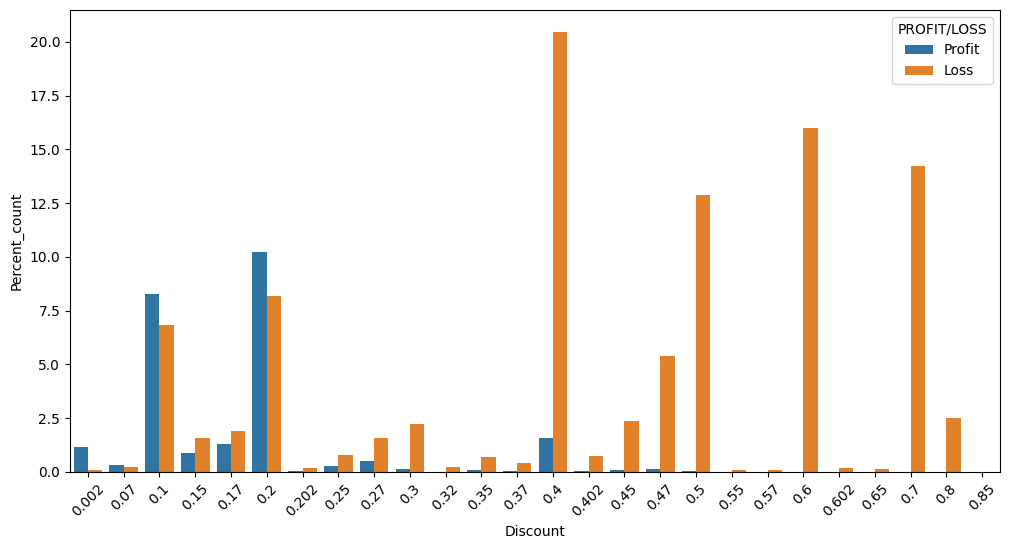

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=grouped_profit_df[grouped_profit_df['Discount']!=0.0]['Discount'],y=grouped_profit_df['Percent_count'],hue=grouped_profit_df['PROFIT/LOSS'])
plt.xticks(rotation=45);

<ipython-input-51-74fa172ac6aa>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_segment_df = df.groupby(['Segment','Discount']).sum()[['Sales','Profit','Profit Margin','Quantity']]


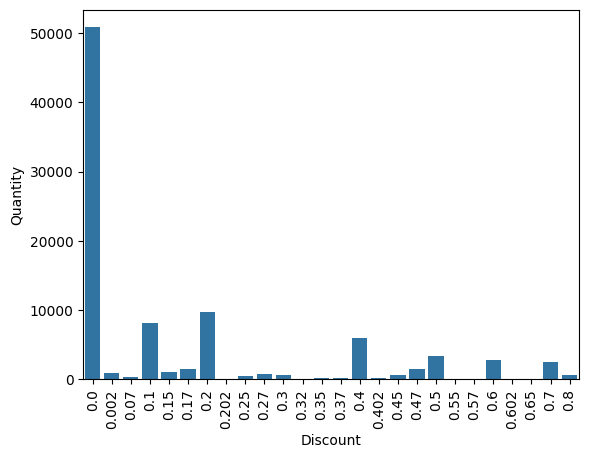

In [ ]:
#PRODUCTS WHICH REQUIRE DISCOUNT
grouped_segment_df = df.groupby(['Segment','Discount']).sum()[['Sales','Profit','Profit Margin','Quantity']]
sns.barplot(data=grouped_segment_df.xs(key='Consumer',level='Segment').sort_values('Profit Margin'),x='Discount',y='Quantity')
plt.xticks(rotation=90);

In [ ]:
grouped_segment_df.xs(key='Consumer',level='Segment').sort_values('Profit Margin',ascending=False)

,Sales,Profit,Profit Margin,Quantity
Discount,,,,
0.000,3588013.50,906796.05,395712.769105,50848
0.200,629483.54,59147.31,37647.879179,9664
0.100,834568.43,136856.37,34493.174408,8060
0.002,131004.11,28900.51,5425.575105,848
0.170,121555.49,13131.57,4270.196691,1424
0.150,149024.59,13443.07,2698.702979,1030
0.070,68992.29,11772.51,1527.276623,308
0.250,45010.86,-264.57,232.938758,464
0.202,8586.52,-522.08,-53.585313,69


In [ ]:
grouped_segment_df.nlargest(10,'Profit Margin')

Sales     Profit  Profit Margin  Quantity
Segment     Discount                                                
Consumer    0.000     3588013.50  906796.05  395712.769105     50848
Corporate   0.000     2107313.97  530889.52  229558.756934     29593
Home Office 0.000     1297083.48  333009.92  143170.074075     18327
Consumer    0.200      629483.54   59147.31   37647.879179      9664
            0.100      834568.43  136856.37   34493.174408      8060
Corporate   0.200      364988.14   32325.33   22558.390465      5692
            0.100      481221.02   79683.26   20587.543776      4667
Home Office 0.200      209360.63   26244.14   13119.025852      3297
            0.100      263818.56   42525.49   11862.296540      2690
Consumer    0.002      131004.11   28900.51    5425.575105       848

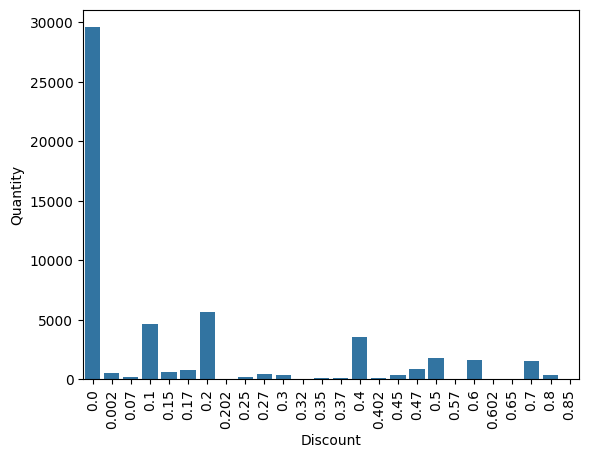

In [ ]:
sns.barplot(data=grouped_segment_df.xs(key='Corporate',level='Segment').sort_values('Profit Margin'),x='Discount',y='Quantity')
plt.xticks(rotation=90);

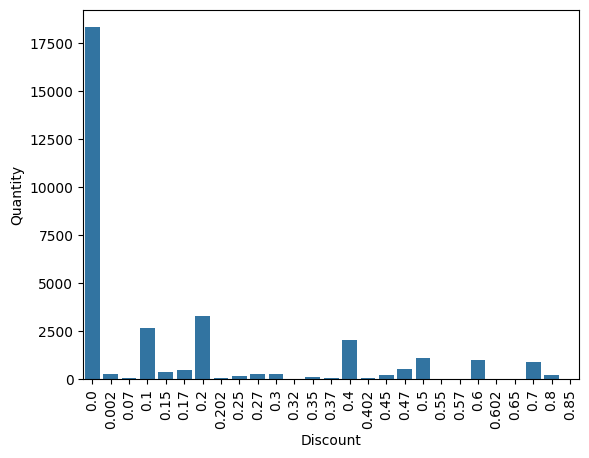

In [ ]:
sns.barplot(data=grouped_segment_df.xs(key='Home Office',level='Segment').sort_values('Profit Margin'),x='Discount',y='Quantity')
plt.xticks(rotation=90);

In [ ]:
df.corr()['Sales'].sort_values()

<ipython-input-40-6d75cf06e5ba>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Sales'].sort_values()


Discount        -0.090103
Row ID          -0.045336
Order Year      -0.001488
Order Month      0.003142
Profit Margin    0.076357
Quantity         0.319222
Profit           0.505406
Shipping Cost    0.784163
Sales            1.000000
Name: Sales, dtype: float64

<ipython-input-64-ebf48dec8257>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['Discount'],y=df['Sales'],ci=None)


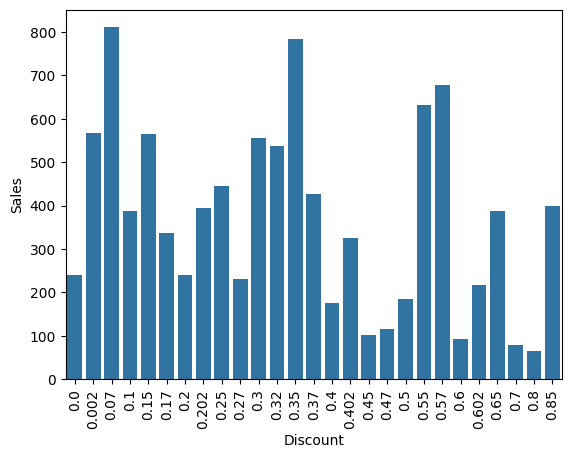

In [ ]:
sns.barplot(x=df['Discount'],y=df['Sales'],ci=None)
plt.xticks(rotation=90);

In [ ]:
df[df['Product Name'] == 'Canon imageCLASS 2200 Advanced Copier'][['Sales','Discount','Profit Margin','Profit per Quantity']]

,Sales,Discount,Profit Margin,Profit per Quantity
11063,8399.98,0.4,13.333365,280.000000
25238,10499.97,0.0,48.000042,1679.996667
44248,13999.96,0.0,47.999994,1679.995000
49003,17499.95,0.0,48.000023,1679.996000
49940,11199.97,0.2,35.000004,979.997500


In [ ]:
df.nsmallest(1,'Sales')
df.iloc[51260]

Order ID                               CA-2014-ZD21925140-41829
Order Date                                  2014-07-09 00:00:00
Ship Date                                   2014-07-09 00:00:00
Ship Mode                                              Same Day
Customer ID                                        ZD-219251408
Customer Name                                Zuschuss Donatelli
Segment                                                Consumer
City                                               Jacksonville
State                                                   Florida
Country                                           United States
Region                                              Southern US
Market                                                     USCA
Product ID                                          TEC-PH-4895
Category                                             Technology
Sub-Category                                             Phones
Product Name           Jabra SPEAK 410 M

In [ ]:
df[df['Product Name'] == 'Jabra SPEAK 410 Multidevice Speakerphone'][['Sales','Discount','Profit Margin','Profit per Quantity']]

,Sales,Discount,Profit Margin,Profit per Quantity
14649,823.96,0.2,6.250303,10.3
41123,370.78,0.4,-25.001349,-30.9
51261,823.96,0.2,6.250303,10.3


In [ ]:
len(df[df['Profit Margin'] < 0]) / len(df) * 100

24.44773733159157

In [ ]:
data = df.groupby("Discount")['Profit'].apply(lambda x: x[x < 0].count()).sort_values()
data

Discount
0.000       0
0.850       2
0.550      10
0.570      12
0.002      13
0.650      17
0.602      23
0.202      25
0.320      27
0.070      30
0.370      49
0.350      84
0.402      91
0.250      98
0.270     195
0.150     200
0.170     236
0.300     281
0.450     295
0.800     316
0.470     678
0.100     857
0.200    1027
0.500    1615
0.700    1786
0.600    2006
0.400    2566
Name: Profit, dtype: int64

In [ ]:
df.describe()

,Row ID,Sales,Quantity,Discount,Profit,Shipping Cost,Order Month,Order Year,Profit Margin
count,51289.000000,51289.000000,51289.000000,51289.000000,51289.000000,51289.000000,51289.000000,51289.000000,51289.000000
mean,25645.337226,246.054101,3.476496,0.142901,28.646840,26.478610,7.516115,2013.777243,4.743099
std,14806.390443,477.439276,2.278761,0.212276,174.153407,57.251931,3.300498,1.098914,46.567648
min,1.000000,0.440000,1.000000,0.000000,-6599.980000,1.002000,1.000000,2012.000000,-473.363674
25%,12823.000000,30.760000,2.000000,0.000000,0.000000,2.610000,5.000000,2013.000000,0.000000
50%,25645.000000,85.050000,3.000000,0.000000,9.240000,7.790000,8.000000,2014.000000,16.919192
75%,38468.000000,251.010000,5.000000,0.200000,36.810000,24.450000,10.000000,2015.000000,33.314452
max,51290.000000,17499.950000,14.000000,0.850000,8399.980000,933.570000,12.000000,2015.000000,50.021978


In [ ]:
df.nsmallest(10,'Profit Margin')

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Returned,Order Month,Order Year,Profit Margin
13252,16939,IT-2013-MW1823548-41594,2013-11-16,2013-11-21,Standard Class,MW-1823548,Mitch Willingham,Corporate,Hanover,Lower Saxony,...,241.70,6,0.85,-1144.12,23.38,High,No,11,2013,-473.363674
21797,15335,IT-2013-NB18580139-41293,2013-01-19,2013-01-23,Standard Class,NB-18580139,Nicole Brennan,Corporate,Birmingham,England,...,70.43,7,0.80,-271.24,10.74,High,No,1,2013,-385.119977
28760,23658,ID-2013-BG1103597-41417,2013-05-23,2013-05-30,Standard Class,BG-1103597,Barry Gonzalez,Consumer,Peshawar,Khyber Pakhtunkhwa,...,63.47,1,0.80,-244.39,6.07,Low,No,5,2013,-385.048054
18006,26978,ID-2012-GP1474097-41046,2012-05-17,2012-05-22,Standard Class,GP-1474097,Guy Phonely,Corporate,Rawalpindi,Punjab,...,126.95,2,0.80,-488.77,14.94,High,No,5,2012,-385.009846
23069,23527,ID-2014-TN2104097-41738,2014-04-09,2014-04-13,Standard Class,TN-2104097,Tanja Norvell,Home Office,Hyderabad,Sindh,...,108.40,2,0.80,-390.26,9.62,Medium,No,4,2014,-360.018450
5321,11684,IT-2013-BF1121548-41425,2013-05-31,2013-06-02,Second Class,BF-1121548,Benjamin Farhat,Home Office,Hanover,Lower Saxony,...,555.14,4,0.85,-1924.54,62.75,High,No,5,2013,-346.676514
25757,27383,ID-2014-BK11260118-41775,2014-05-16,2014-05-22,Standard Class,BK-11260118,Berenike Kampe,Consumer,Ulsan,Ulsan,...,99.83,2,0.80,-344.41,7.72,Medium,No,5,2014,-344.996494
49446,23753,ID-2012-BG1174097-41151,2012-08-30,2012-09-03,Standard Class,BG-1174097,Bruce Geld,Consumer,Lahore,Punjab,...,374.86,4,0.80,-1218.38,1.25,Medium,No,8,2012,-325.022675
17973,31558,US-2015-Dl13600140-42164,2015-06-09,2015-06-13,Standard Class,Dl-136001402,Dorris liebe,Corporate,Pasadena,Texas,...,1.62,2,0.80,-4.47,1.02,Medium,No,6,2015,-275.925926
38642,40461,CA-2013-MG17695140-41433,2013-06-08,2013-06-12,Standard Class,MG-176951402,Maureen Gnade,Consumer,Chicago,Illinois,...,143.13,2,0.80,-393.60,1.56,Medium,No,6,2013,-274.994760


In [ ]:
df.groupby('Discount').min()[['Profit Margin','Sales']]

,Profit Margin,Sales
Discount,,
0.000,0.000000,0.99
0.002,-0.201147,78.64
0.070,-7.526882,112.94
0.100,-11.145511,5.32
0.150,-17.648579,6.66
0.170,-20.508475,4.73
0.200,-25.028313,1.34
0.202,-25.313165,63.65
0.250,-33.335856,21.40


In [ ]:
df.groupby('Region').count()['Order ID'].sort_values()

Region
Central Asia          217
Canada                384
Southern Africa       478
Central Africa        643
Eastern Africa        728
North Africa         1278
Western Africa       1460
Eastern Europe       1529
Southern US          1619
Caribbean            1690
Southern Europe      2113
Northern Europe      2204
Central US           2323
Eastern Asia         2374
Western Asia         2440
Southern Asia        2655
Eastern US           2848
South America        2988
Southeastern Asia    3129
Western US           3203
Oceania              3487
Central America      5616
Western Europe       5883
Name: Order ID, dtype: int64

<ipython-input-82-86cde6c55330>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Category', y='Profit', data=region_data,hue='Discount' ,ci=None)


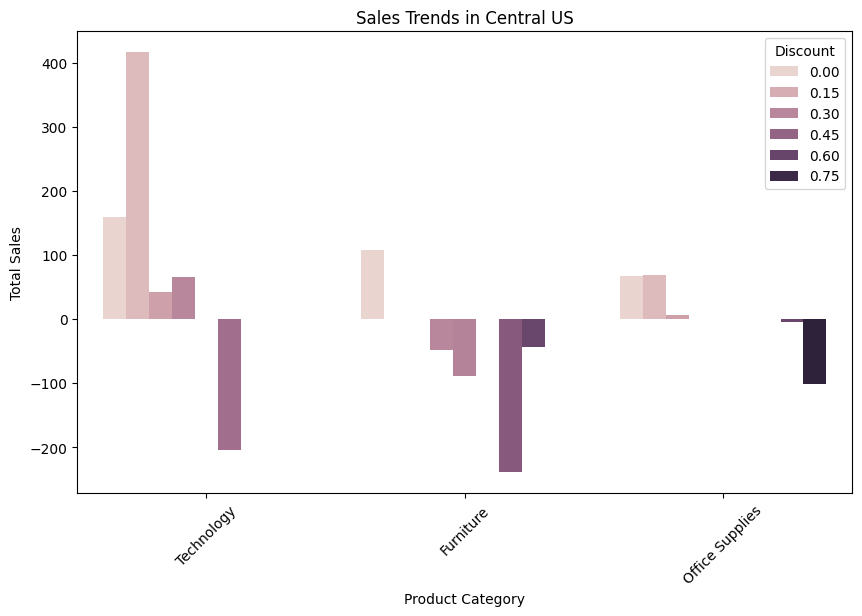

<ipython-input-82-86cde6c55330>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Category', y='Profit', data=region_data,hue='Discount' ,ci=None)


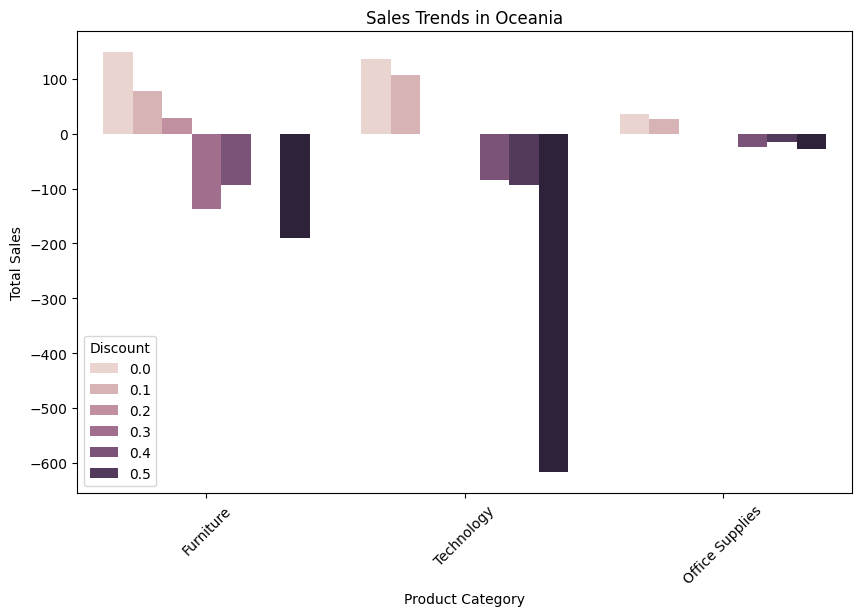

<ipython-input-82-86cde6c55330>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Category', y='Profit', data=region_data,hue='Discount' ,ci=None)


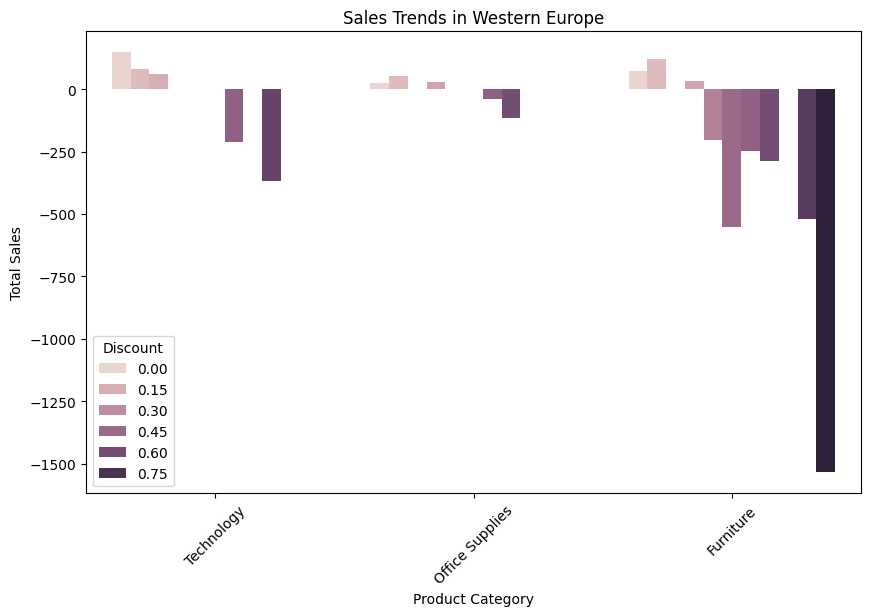

<ipython-input-82-86cde6c55330>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Category', y='Profit', data=region_data,hue='Discount' ,ci=None)


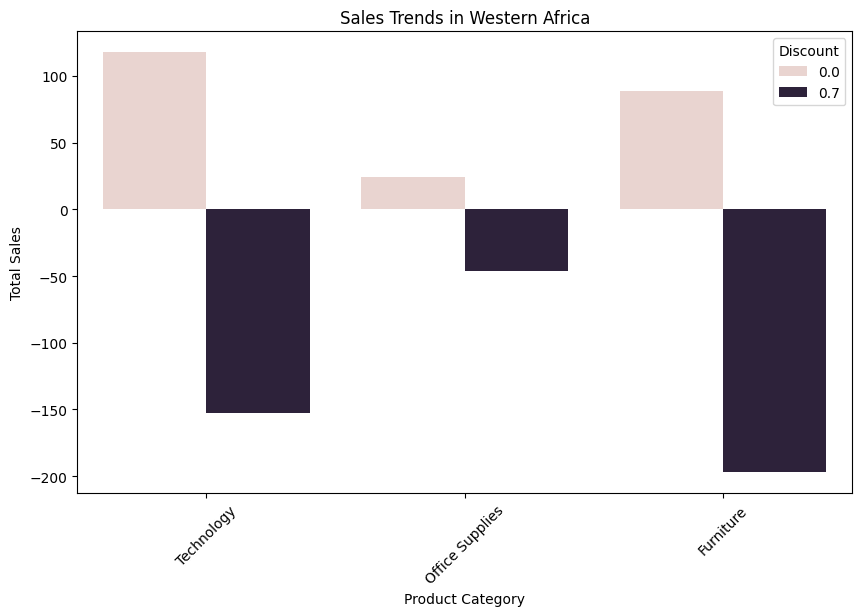

<ipython-input-82-86cde6c55330>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Category', y='Profit', data=region_data,hue='Discount' ,ci=None)


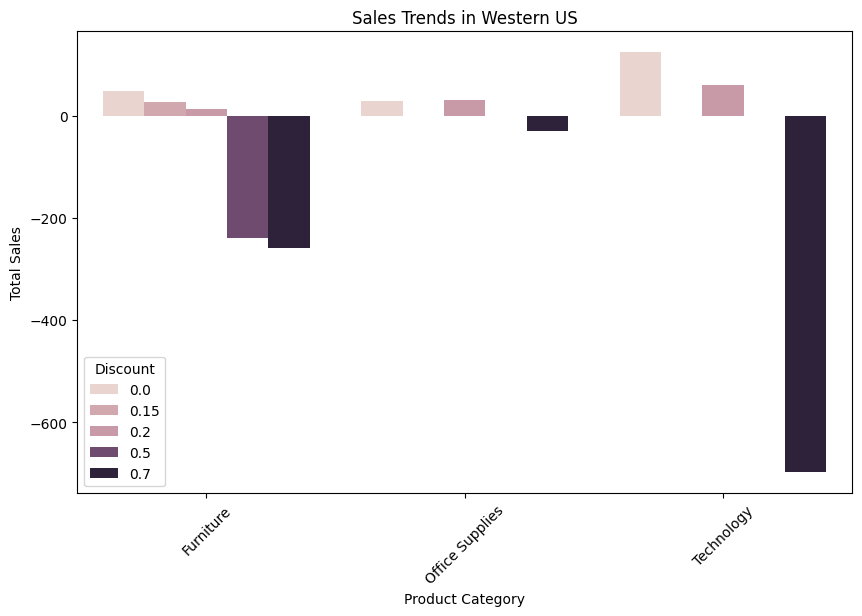

<ipython-input-82-86cde6c55330>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Category', y='Profit', data=region_data,hue='Discount' ,ci=None)


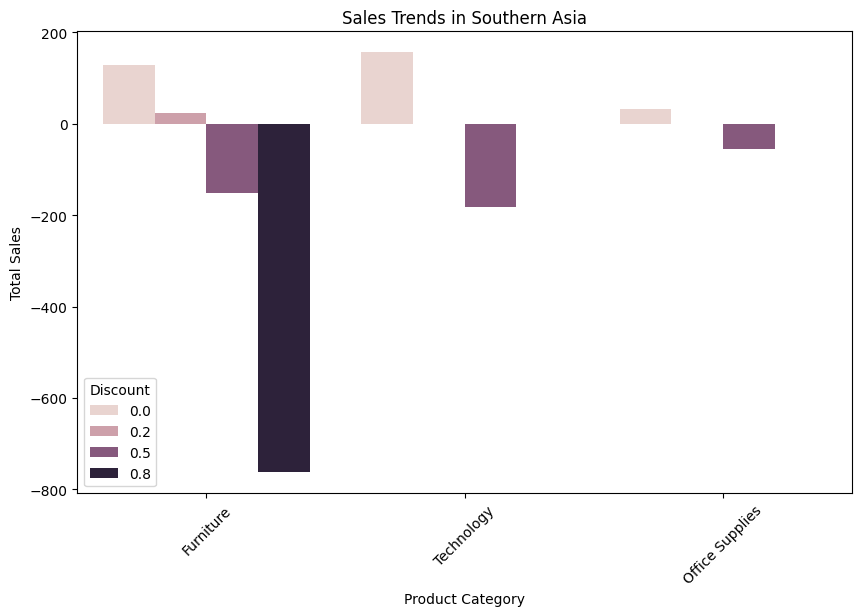

<ipython-input-82-86cde6c55330>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Category', y='Profit', data=region_data,hue='Discount' ,ci=None)


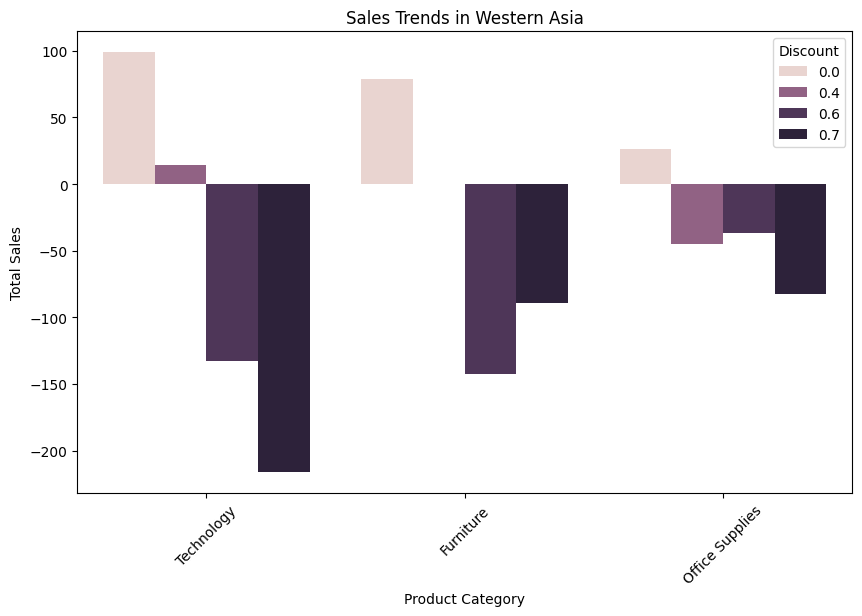

<ipython-input-82-86cde6c55330>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Category', y='Profit', data=region_data,hue='Discount' ,ci=None)


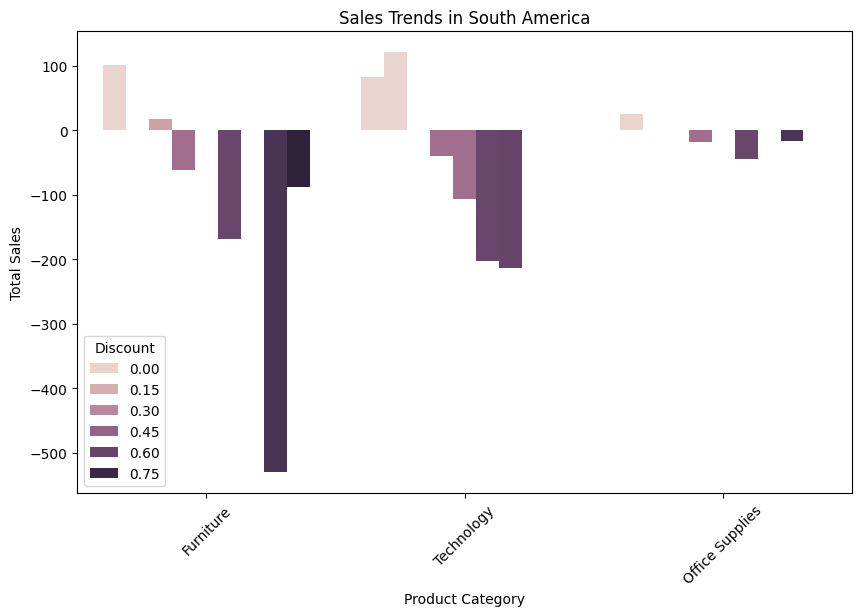

<ipython-input-82-86cde6c55330>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Category', y='Profit', data=region_data,hue='Discount' ,ci=None)


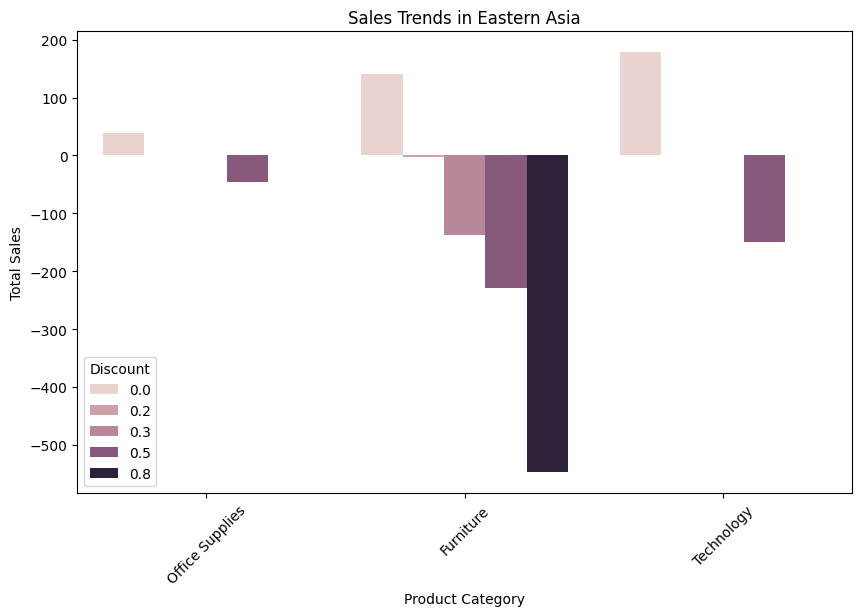

<ipython-input-82-86cde6c55330>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Category', y='Profit', data=region_data,hue='Discount' ,ci=None)


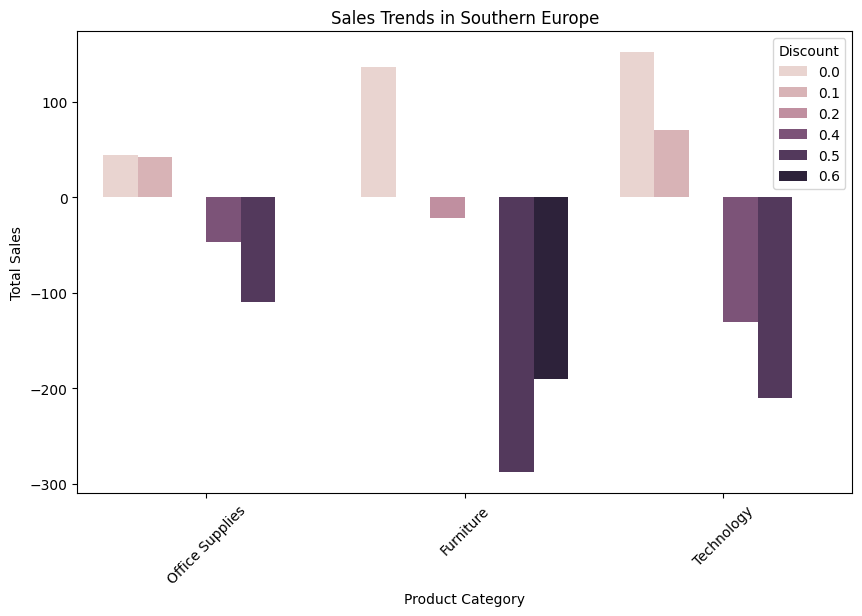

<ipython-input-82-86cde6c55330>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Category', y='Profit', data=region_data,hue='Discount' ,ci=None)


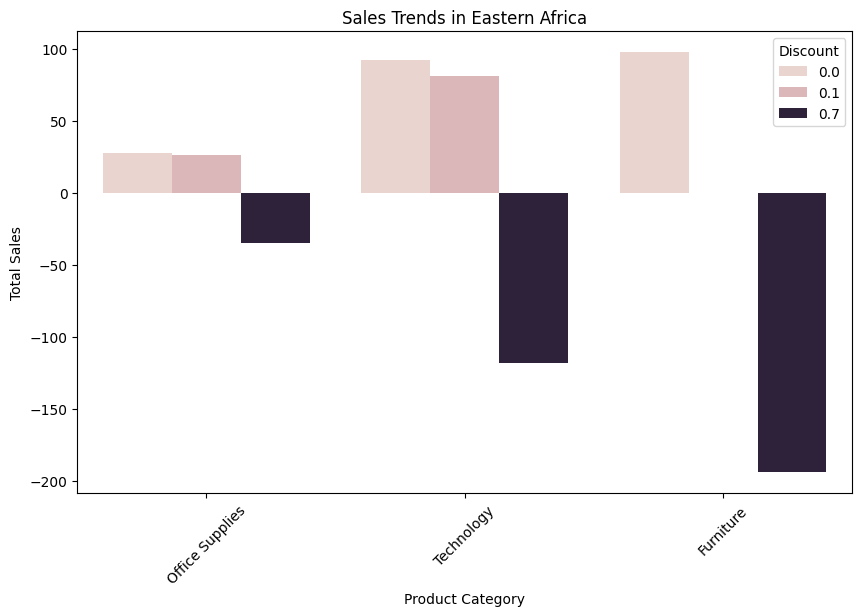

<ipython-input-82-86cde6c55330>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Category', y='Profit', data=region_data,hue='Discount' ,ci=None)


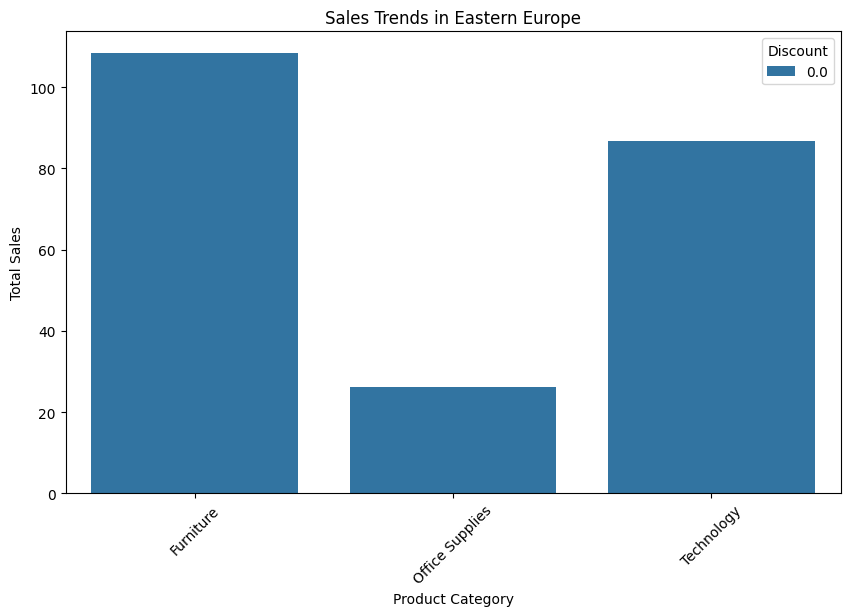

<ipython-input-82-86cde6c55330>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Category', y='Profit', data=region_data,hue='Discount' ,ci=None)


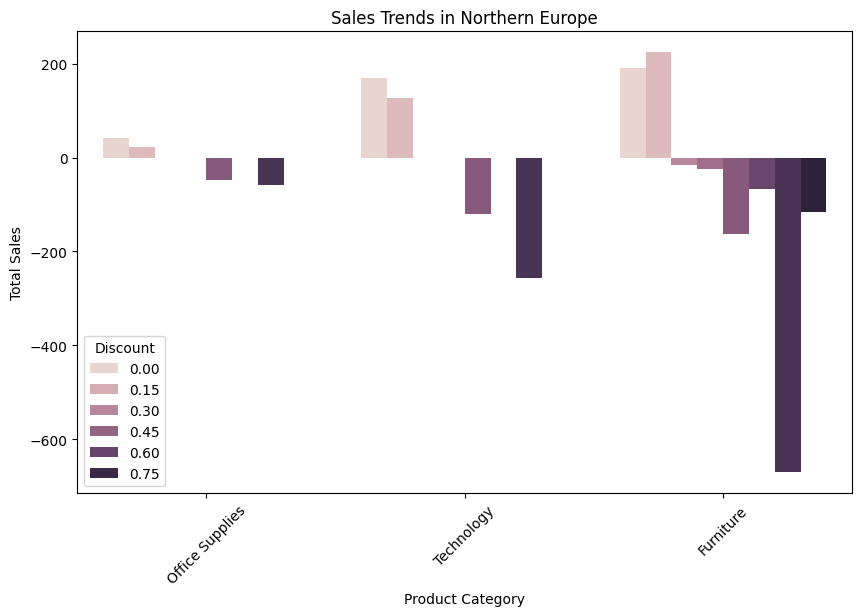

<ipython-input-82-86cde6c55330>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Category', y='Profit', data=region_data,hue='Discount' ,ci=None)


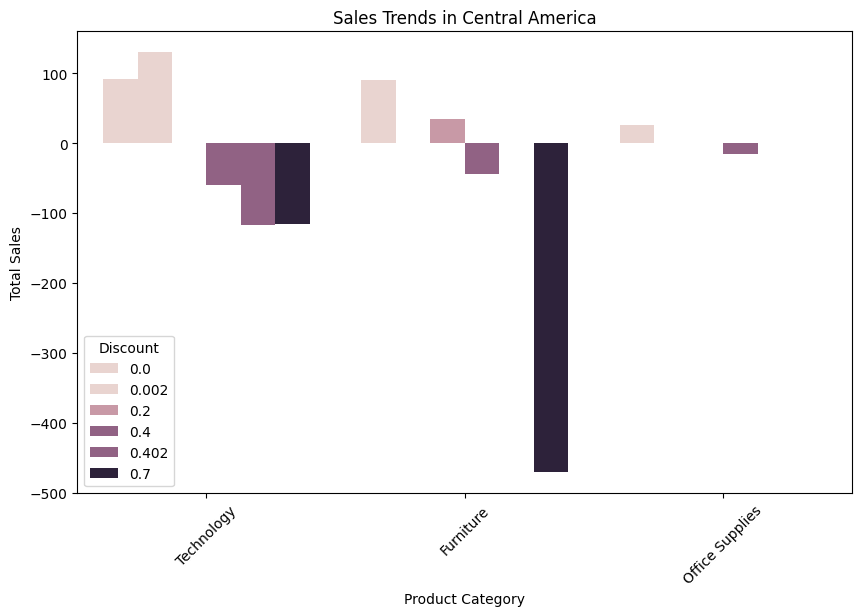

<ipython-input-82-86cde6c55330>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Category', y='Profit', data=region_data,hue='Discount' ,ci=None)


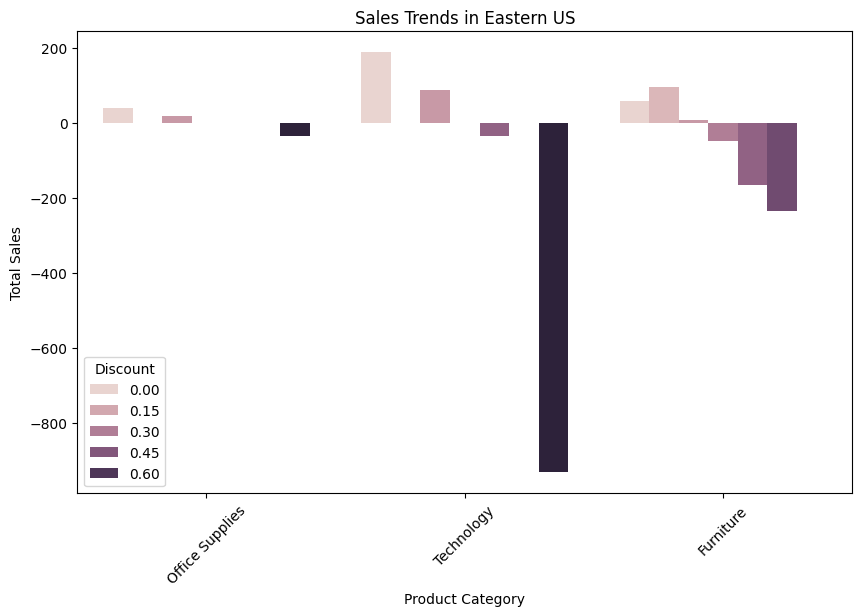

<ipython-input-82-86cde6c55330>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Category', y='Profit', data=region_data,hue='Discount' ,ci=None)


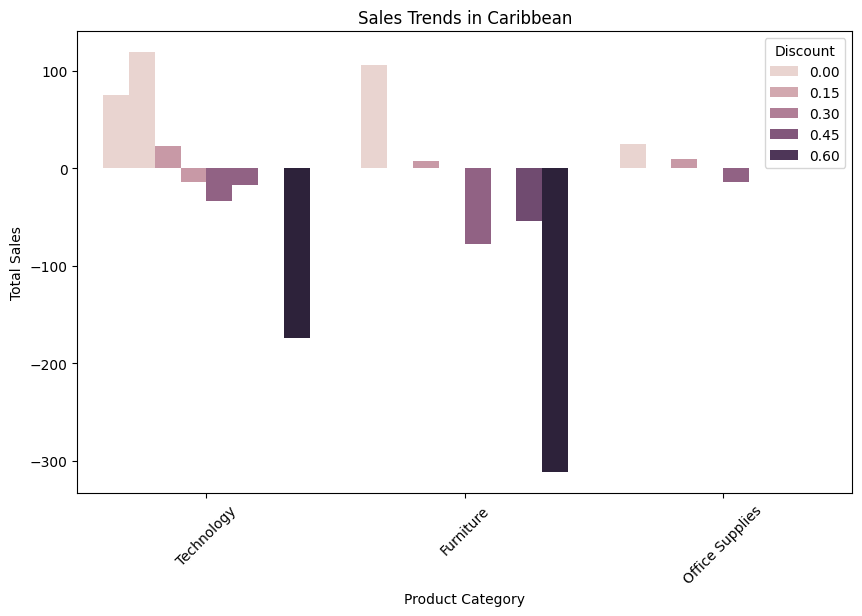

<ipython-input-82-86cde6c55330>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Category', y='Profit', data=region_data,hue='Discount' ,ci=None)


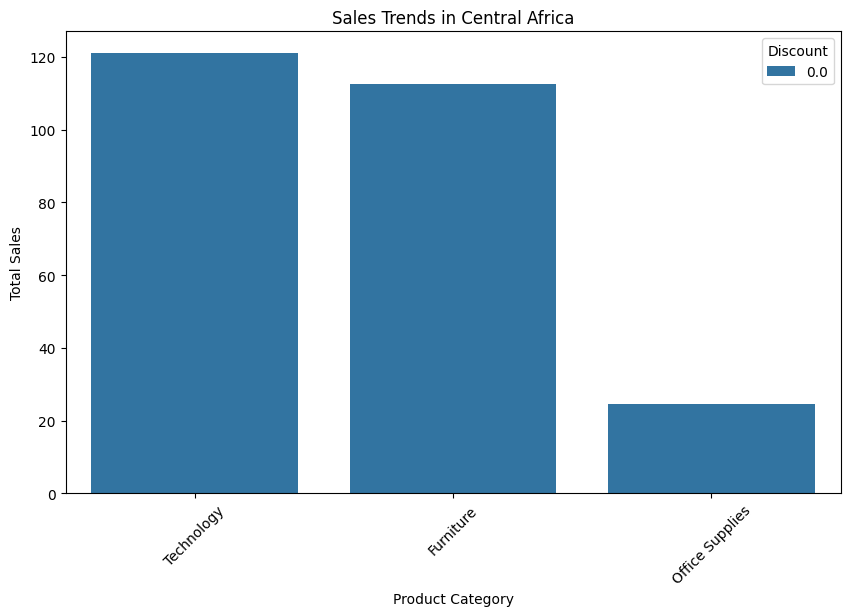

<ipython-input-82-86cde6c55330>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Category', y='Profit', data=region_data,hue='Discount' ,ci=None)


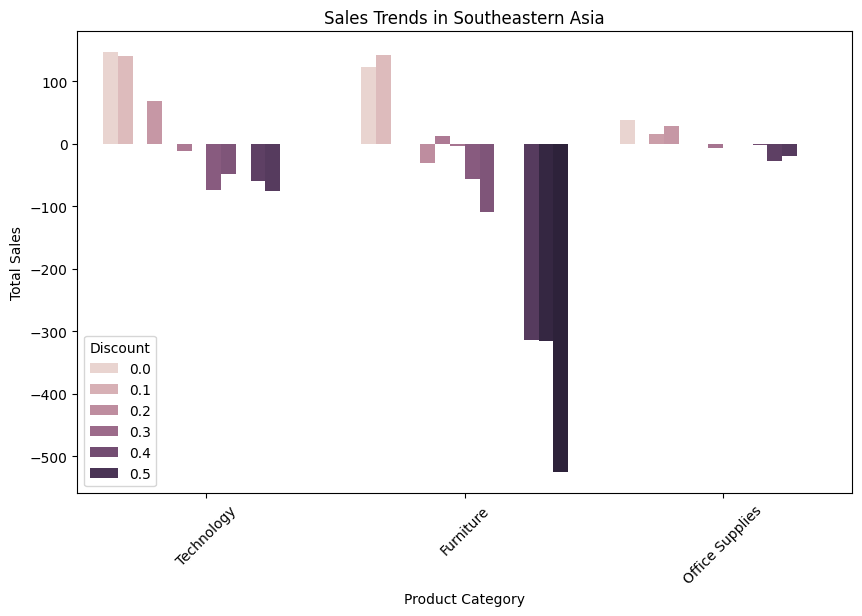

<ipython-input-82-86cde6c55330>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Category', y='Profit', data=region_data,hue='Discount' ,ci=None)


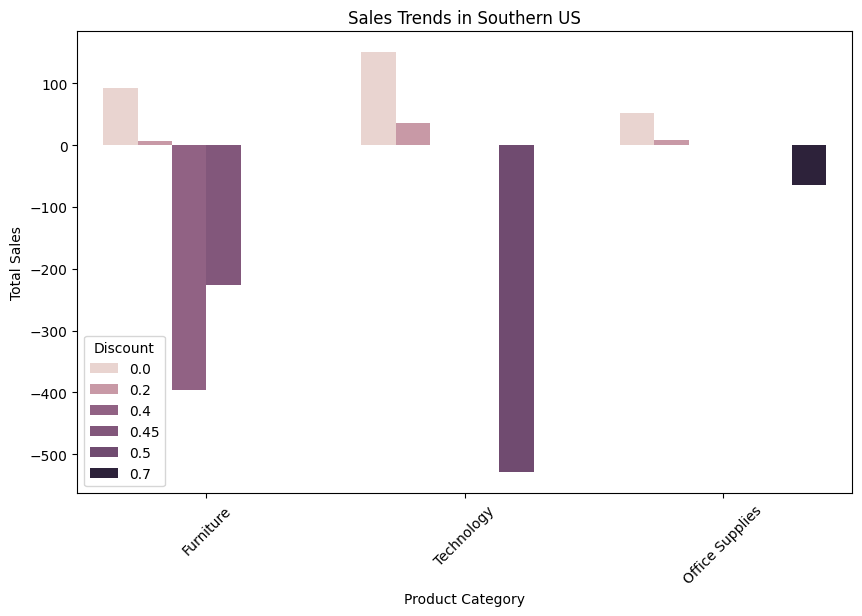

<ipython-input-82-86cde6c55330>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Category', y='Profit', data=region_data,hue='Discount' ,ci=None)


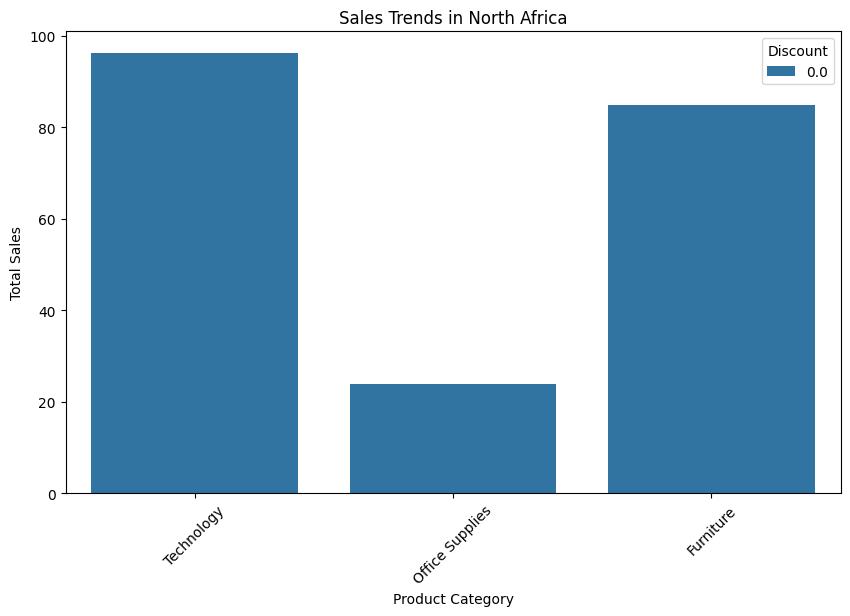

<ipython-input-82-86cde6c55330>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Category', y='Profit', data=region_data,hue='Discount' ,ci=None)


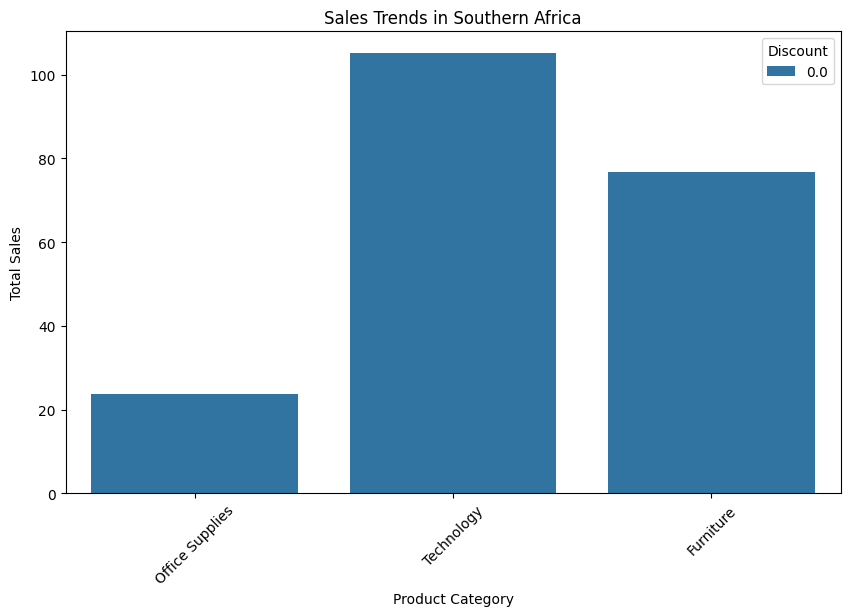

<ipython-input-82-86cde6c55330>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Category', y='Profit', data=region_data,hue='Discount' ,ci=None)


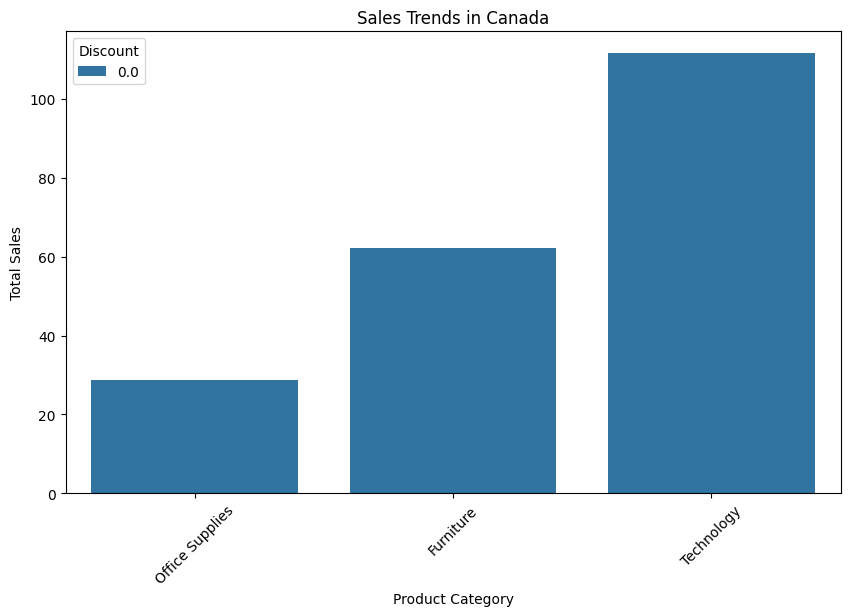

<ipython-input-82-86cde6c55330>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Category', y='Profit', data=region_data,hue='Discount' ,ci=None)


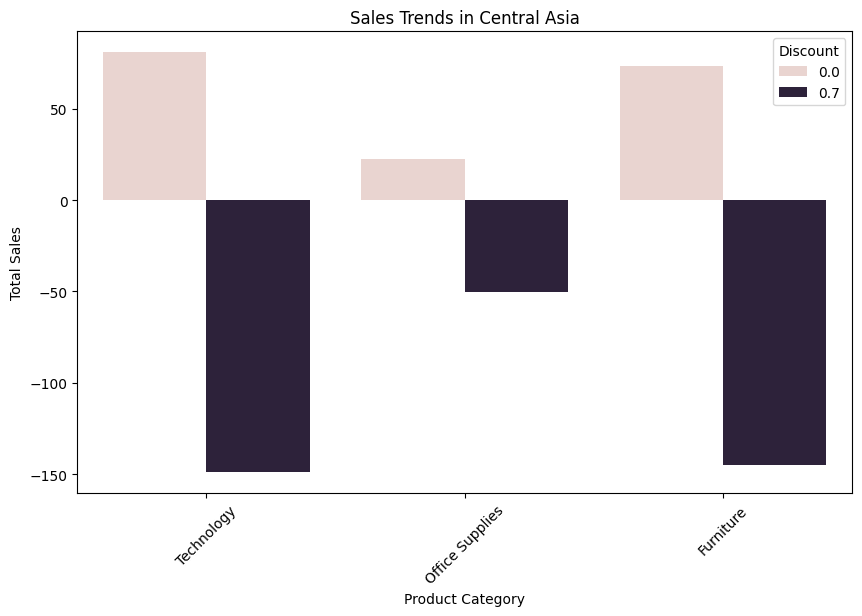

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
regions = df['Region'].unique()
for region in regions:
    region_data = df[df['Region'] == region]
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Category', y='Profit', data=region_data,hue='Discount' ,ci=None)
    plt.title(f'Sales Trends in {region}')
    plt.xlabel('Product Category')
    plt.ylabel('Total Sales')
    plt.xticks(rotation=45)
    plt.show();

In [ ]:
df.groupby(['Region', 'Category'])['Profit'].sum().reset_index().nsmallest(10,'Profit')

,Region,Category,Profit
57,Western Africa,Furniture,-19131.79
61,Western Asia,Office Supplies,-18919.77
58,Western Africa,Office Supplies,-18374.82
60,Western Asia,Furniture,-18234.96
62,Western Asia,Technology,-16766.97
59,Western Africa,Technology,-12901.64
42,Southeastern Asia,Furniture,-7269.69
13,Central Asia,Office Supplies,-2892.97
15,Central US,Furniture,-2867.17
14,Central Asia,Technology,-2649.76


In [ ]:
df[df['Region'].isin(['Western Africa','Western Asia'])].groupby(['Region','Category','Discount']).mean()[['Sales','Profit','Profit Margin']]

<ipython-input-134-9dfff78d553c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df[df['Region'].isin(['Western Africa','Western Asia'])].groupby(['Region','Category','Discount']).mean()[['Sales','Profit','Profit Margin']]


Sales      Profit  Profit Margin
Region         Category        Discount                                       
Western Africa Furniture       0.0       317.776957   88.415217      25.840081
                               0.7       138.121250 -197.128437    -153.037217
               Office Supplies 0.0       106.754576   24.613729      24.118870
                               0.7        30.466345  -45.834315    -148.449492
               Technology      0.0       453.111591  117.644091      22.522176
                               0.7       100.351290 -152.853011    -151.532336
Western Asia   Furniture       0.0       302.984062   78.907875      24.295794
                               0.6       163.955070 -142.367042     -87.342374
                               0.7        63.550000  -89.340000    -166.733488
               Office Supplies 0.0       107.742818   26.472496      24.778962
                               0.4       102.650000  -44.837500     -45.449984
                               0.6        40.296232  -37.072873     -87.595070
                               0.7        59.295000  -82.533667    -162.553355
               Technology      0.0       426.412081   98.879239      24.362201
                               0.4       535.475000   14.307500       2.484119
                               0.6       142.759154 -132.969808     -91.623617
                               0.7       131.213750 -216.407500    -150.910878

In [ ]:
df[df['Region'].isin(['Western Africa','Western Asia'])].groupby(['Region','Category','Discount']).count()['Sales']

Region          Category         Discount
Western Africa  Furniture        0.0          69
                                 0.7         128
                Office Supplies  0.0         354
                                 0.7         591
                Technology       0.0         132
                                 0.7         186
Western Asia    Furniture        0.0         160
                                 0.6         213
                                 0.7           6
                Office Supplies  0.0         653
                                 0.4           4
                                 0.6         905
                                 0.7          30
                Technology       0.0         197
                                 0.4           4
                                 0.6         260
                                 0.7           8
Name: Sales, dtype: int64

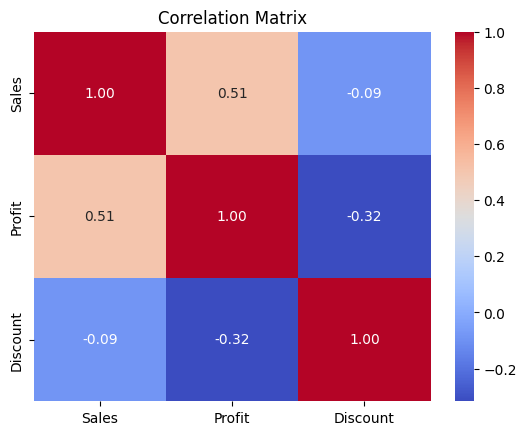

In [ ]:
#Heatmap of the correlation matrix
correlation_matrix = df[['Sales', 'Profit', 'Discount']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

<ipython-input-29-ef3b514812cc>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['Discount'],y=df['Profit Margin'],hue=df['Category'],ci=None)


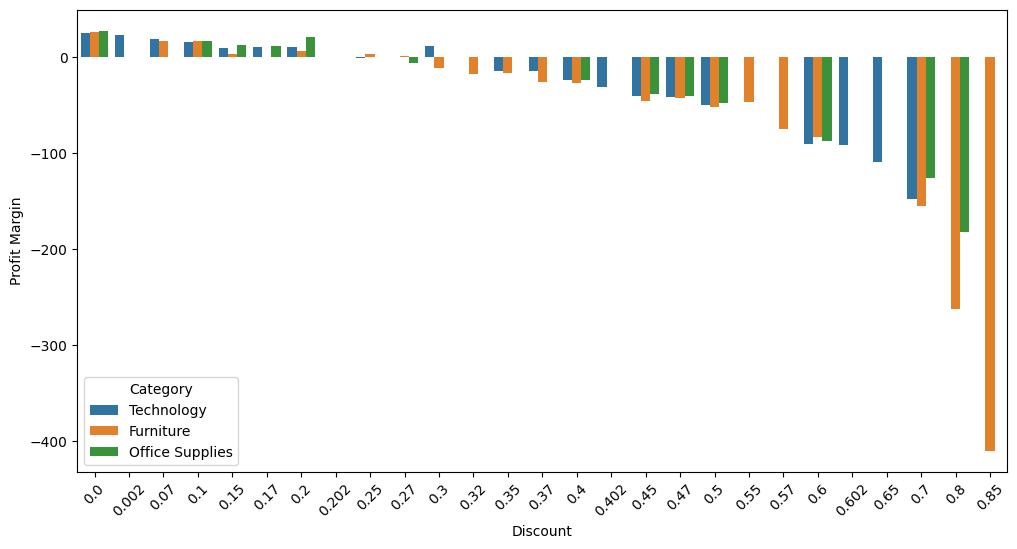

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['Discount'],y=df['Profit Margin'],hue=df['Category'],ci=None)
plt.xticks(rotation=45);

<Axes: xlabel='Profit Margin', ylabel='Sales'>

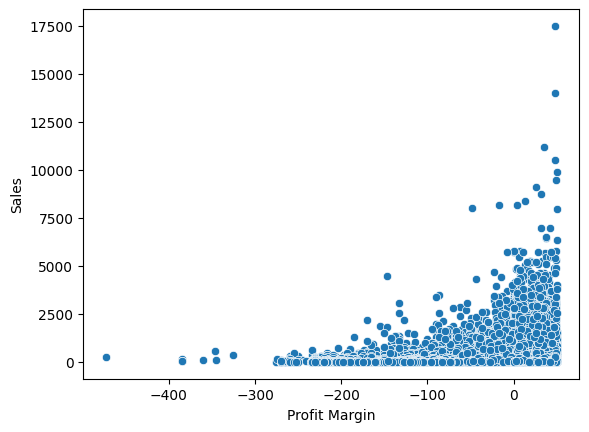

In [ ]:
sns.scatterplot(x=df['Profit Margin'],y=df['Sales'])

<ipython-input-35-f2ebe62a9b10>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['Region'],y=df['Profit'],hue=df['Segment'],ci=None)


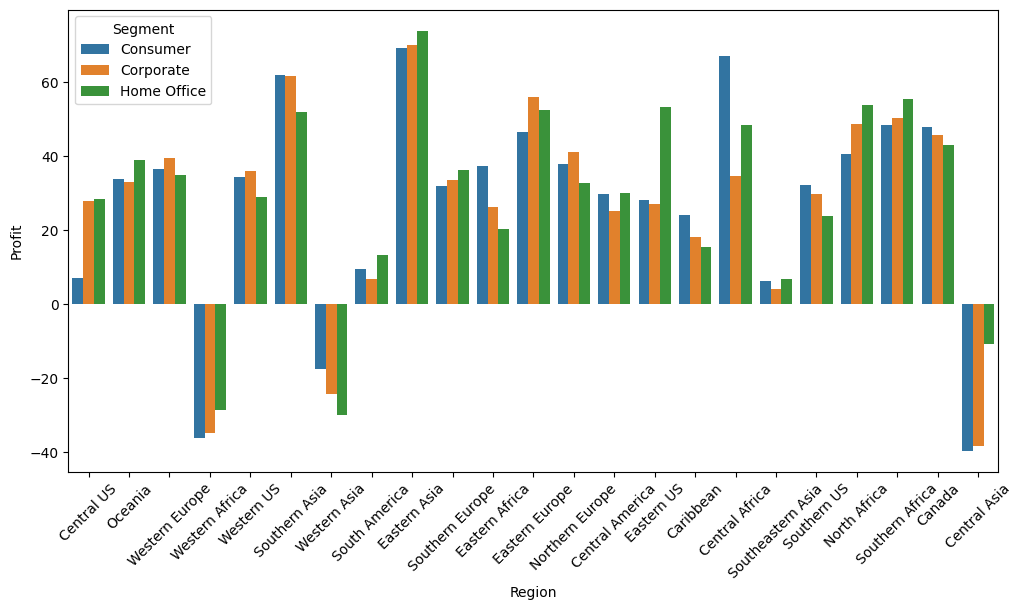

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['Region'],y=df['Profit'],hue=df['Segment'],ci=None)
plt.xticks(rotation=45);

Regional Behavior of Customers:
               Region  num_customers   avg_sales  avg_profit
0              Canada            181  174.292109   46.399453
1           Caribbean            694  191.882183   20.456420
2      Central Africa            307  223.374821   55.029098
3     Central America           1909  217.788602   28.308727
4        Central Asia            111   88.992995  -33.557880
5          Central US            629  215.772656   17.092742
6      Eastern Africa            364  175.626456   30.083613
7        Eastern Asia            774  360.176757   70.388210
8      Eastern Europe            713  202.768764   50.415226
9          Eastern US            674  238.336152   32.135818
10       North Africa            559  182.485610   45.255282
11    Northern Europe            807  288.920123   38.077718
12            Oceania            921  315.510665   34.439249
13      South America           1099  206.567483    9.401098
14  Southeastern Asia           1207  282.653867    5

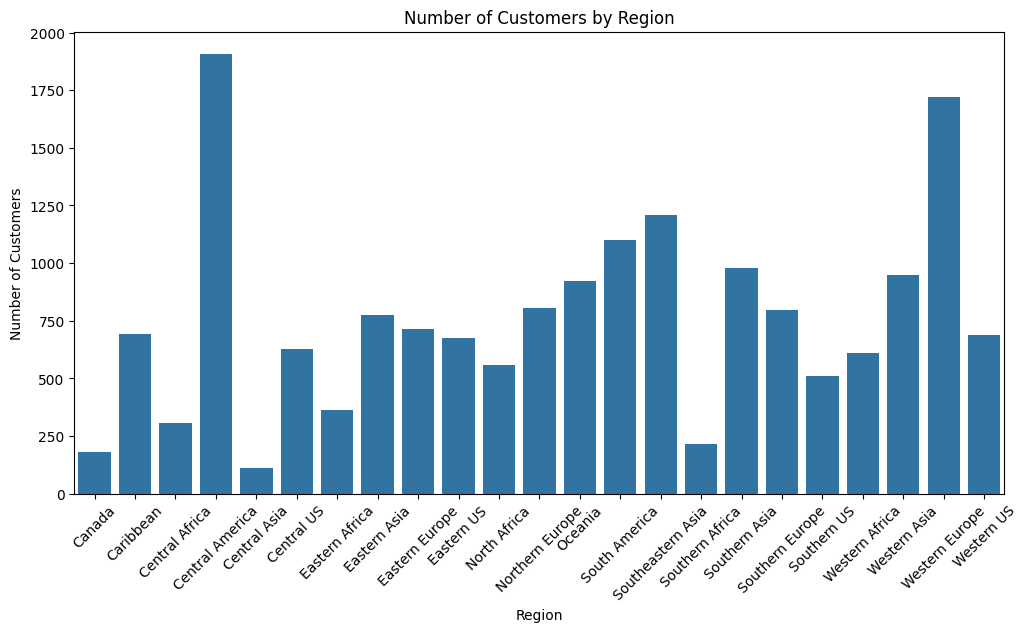

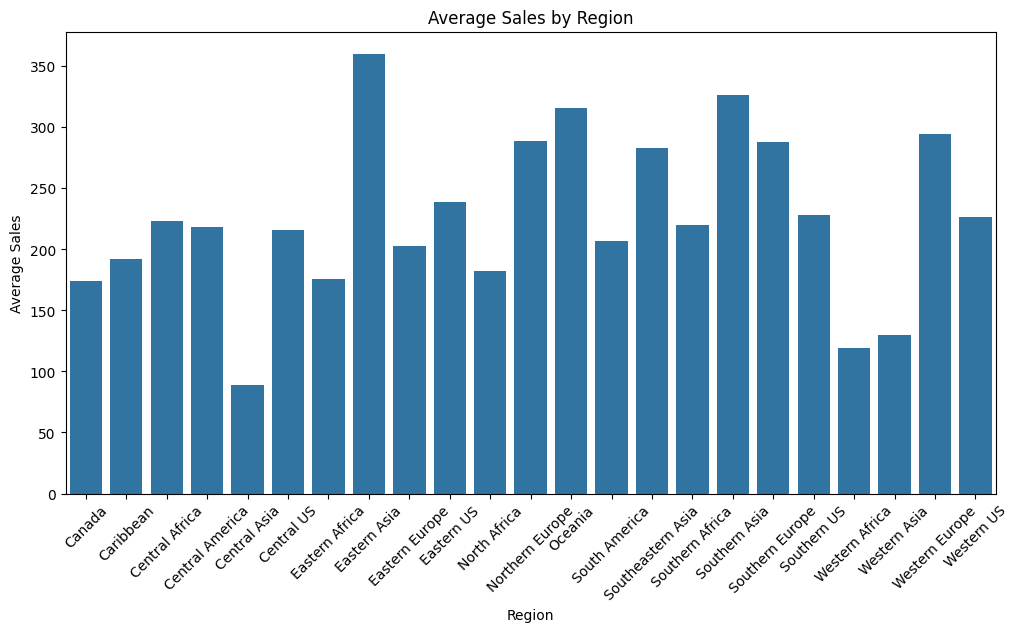

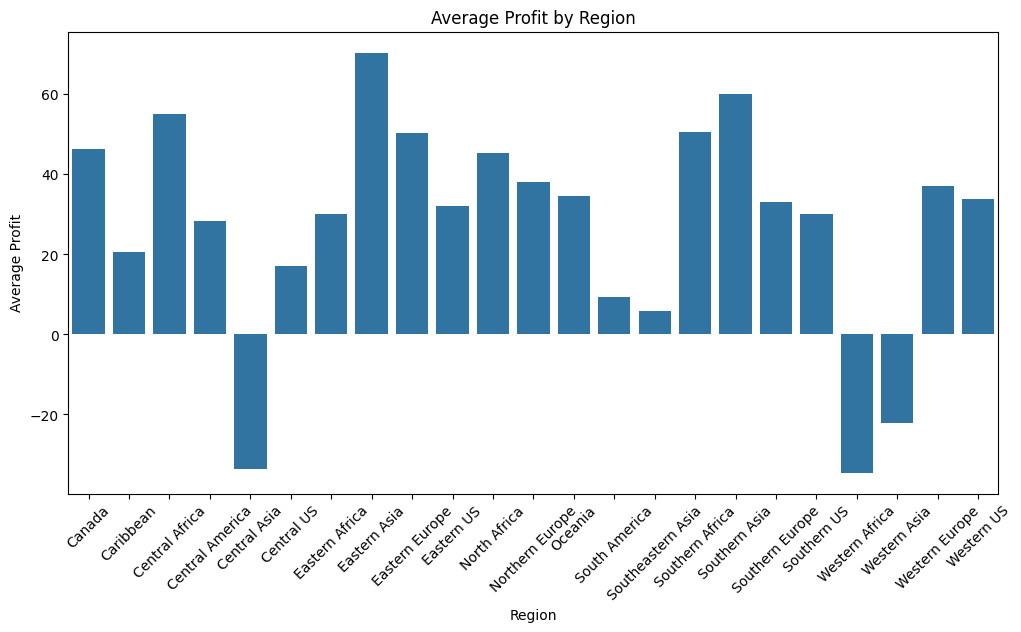

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' containing the sales data with columns:
# 'Region', 'Customer ID', 'Sales', 'Profit', and other relevant attributes

# Group the data by region and calculate various metrics
region_metrics = df.groupby('Region').agg(
    num_customers=('Customer ID', 'nunique'),
    avg_sales=('Sales', 'mean'),
    avg_profit=('Profit', 'mean')
).reset_index()

# Print the regional metrics
print("Regional Behavior of Customers:")
print(region_metrics)

# Visualize the regional behavior using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='num_customers', data=region_metrics)
plt.title('Number of Customers by Region')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.ylabel('Number of Customers')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='avg_sales', data=region_metrics)
plt.title('Average Sales by Region')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.ylabel('Average Sales')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='avg_profit', data=region_metrics)
plt.title('Average Profit by Region')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.ylabel('Average Profit')
plt.show()


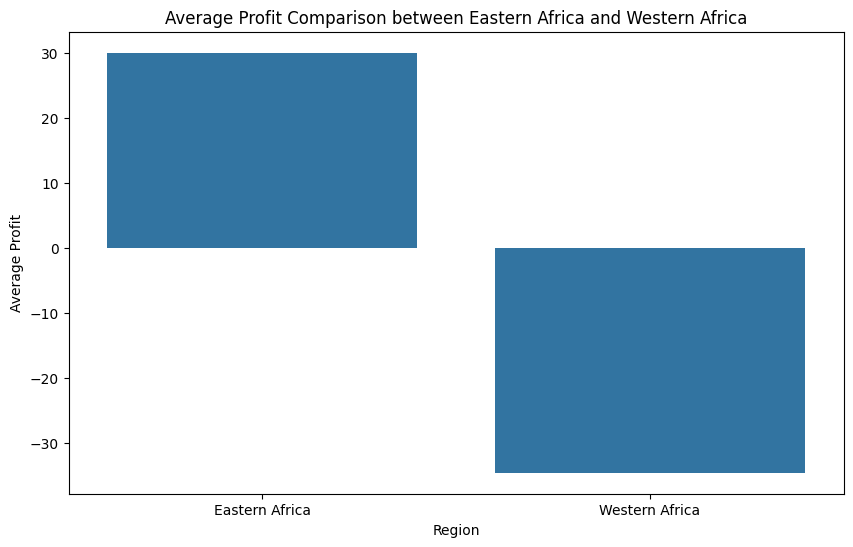

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' containing the sales data with columns:
# 'Region' and 'Profit'

# Filter data for Eastern Africa and Western Africa
eastern_africa_data = df[df['Region'] == 'Eastern Africa']
western_africa_data = df[df['Region'] == 'Western Africa']

# Calculate average profit for each region
avg_profit_eastern_africa = eastern_africa_data['Profit'].mean()
avg_profit_western_africa = western_africa_data['Profit'].mean()

# Create a bar plot to visualize the average profit for each region
plt.figure(figsize=(10, 6))
sns.barplot(x=['Eastern Africa', 'Western Africa'], y=[avg_profit_eastern_africa, avg_profit_western_africa])
plt.title('Average Profit Comparison between Eastern Africa and Western Africa')
plt.xlabel('Region')
plt.ylabel('Average Profit')
plt.show()


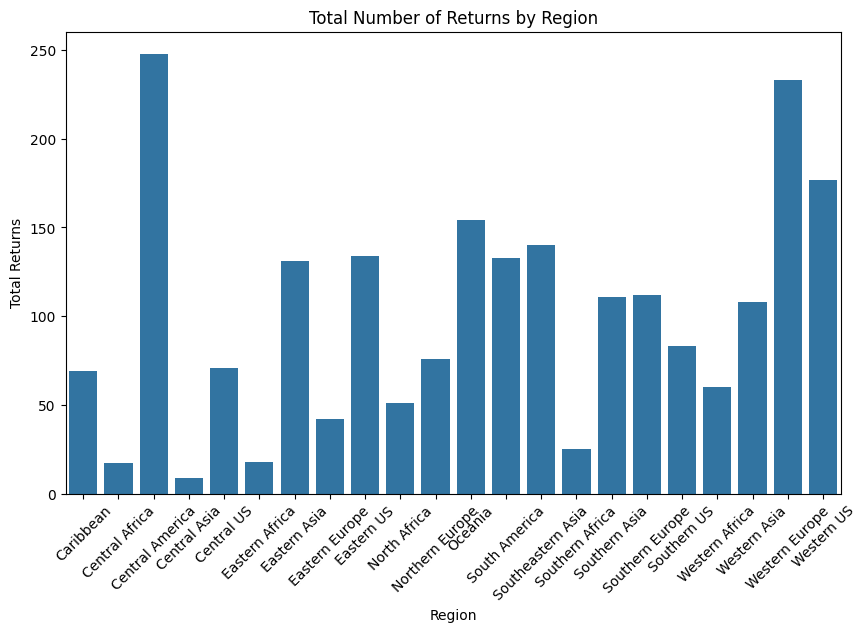

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' containing the sales data with columns:
# 'Region' and 'Returned'

# Filter the data for returned orders
returned_orders = df[df['Returned'] == 'Yes']

# Group the filtered data by 'Region' and count the number of returns in each region
returns_by_region = returned_orders.groupby('Region')['Returned'].count().reset_index()

# Plot the results using a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Returned', data=returns_by_region)
plt.title('Total Number of Returns by Region')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.ylabel('Total Returns')
plt.show()


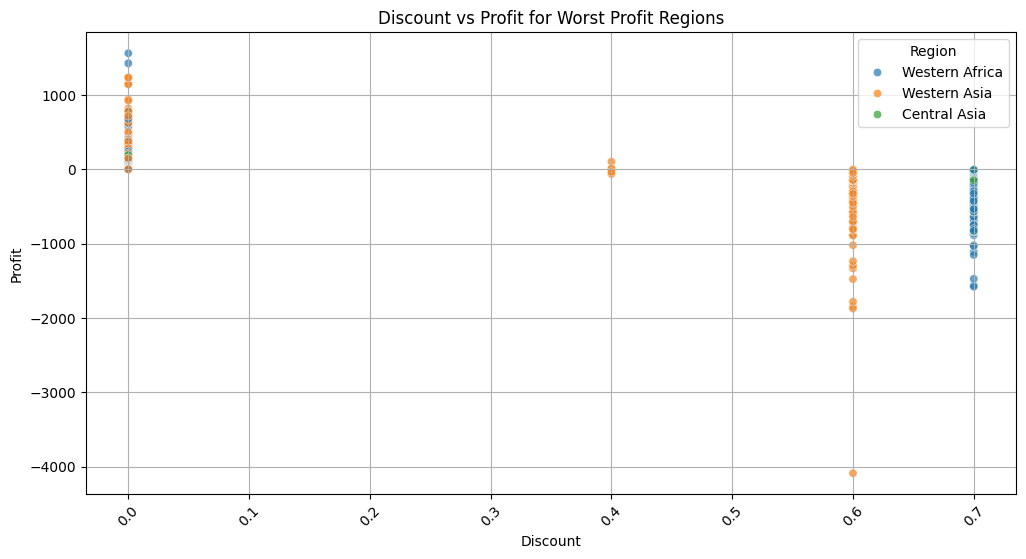

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for Western Africa, Central Asia, and Western Asia
worst_profit_regions = ['Western Africa', 'Central Asia', 'Western Asia']
worst_profit_data = df[df['Region'].isin(worst_profit_regions)]

# Plot discount vs profit for the worst profit regions
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Discount', y='Profit', hue='Region', data=worst_profit_data, alpha=0.7)
plt.title('Discount vs Profit for Worst Profit Regions')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Region')
plt.show()
